In [2]:
#Importing libraries
import matplotlib.pyplot as plt
import mne
from pathlib import Path
import seaborn as sns

from deepjr.simulation import jr_typical_param
from deepjr.simulation import JRSimulator, EventRelatedExp, SimResults

# Genral Information

These are the values for the Jansen Rit Model which are available in the literature, particularly from [this paper](https://mathematical-neuroscience.springeropen.com/articles/10.1186/s13408-017-0046-4/tables/1). The value of $v_{max}$ was corrected from 5 Hz to 50 Hz, a more reasonable value and a value that compatible with other publications (e.g., [this one](https://link.springer.com/article/10.1007/s10827-013-0493-1#Tab1)). Minimum and maximum values are defined as per [the code of The Virtual Brain](https://docs.thevirtualbrain.org/_modules/tvb/simulator/models/jansen_rit.html).




| Parameter  | Description                                                                  | Typical value | min value | max value |
| ---------- | ---------------------------------------------------------------------------- | ------------- | --------- | --------- |
| $A_e$      | Average excitatory synaptic gain                                             | 3.25 mV       | 2.6 mV    | 9.75 mV   | 
| $A_i$      | Average inhibitory synaptic gain 	                                        | 22 mV         | 17.6 mV   | 110.0 mV  |
| $b_e$	     | Inverse of the time constant of excitatory postsynaptic potential            | 100 Hz        | 50 Hz     | 150 Hz    |
| $b_i$	     | Inverse of the time constant of inhibitory postsynaptic potential            | 50 Hz         | 25 Hz     | 75 Hz     |
| $C$	     | Average number of synapses between the populations 	                        | 135           | 65        | 1350      |
| $a_1$      | Average probability of synaptic contacts in the feedback excitatory loop     | 1.0           | 0.5       | 1.5       |
| $a_2$	     | Average probability of synaptic contacts in the slow feedback excitatory loop| 0.8           | 0.4       | 1.2       |
| $a_3$	     | Average probability of synaptic contacts in the feedback inhibitory loop     | 0.25          | 0.125     | 0.375     |
| $a_4$	     | Average probability of synaptic contacts in the slow feedback inhibitory loop| 0.25          | 0.125     | 0.375     |
| $v_{max}$  | Maximum firing rate of the neural populations (max. of sigmoid fct.)         | 50 Hz         |     -     |     -     | 
| $v_0$      | Value for which 50% of the maximum firing rate is attained 	                | 6 mV          | 3.12 mV   | 6.0 mV    |




In [3]:

import mne
import os
#Fetch all mne dataset if not dowloaded already 

data_path = Path(mne.datasets.sample.data_path(download=True, verbose=False))
sample_dir = data_path / "MEG" / "sample"
subjects_dir = data_path / "subjects"
mne.datasets.fetch_fsaverage()

os.environ['SUBJECTS_DIR'] = str(subjects_dir)

0 files missing from root.txt in /Users/deepatilwani/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /Users/deepatilwani/mne_data/MNE-fsaverage-data/fsaverage


### Getting and info structure, a montage, and a noise covariance matrix for simulation

In [4]:
# Set up the simulator. This also create a head model for EEG simulation. Using mne dataset fsaverage
jr_sim = JRSimulator()
parameters = dict(jr_typical_param)
# Set the experiment.
er_exp = EventRelatedExp(jr_sim.info)

Reading forward solution from /Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/notebooks/fsaverage-fwd.fif.gz...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523 (FIFF_MNE_FORWARD_SOLUTION_GRAD)) not available
    Read EEG forward solution (8196 sources, 64 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


scale_factor has been deprecated and will be removed. Use scale instead.


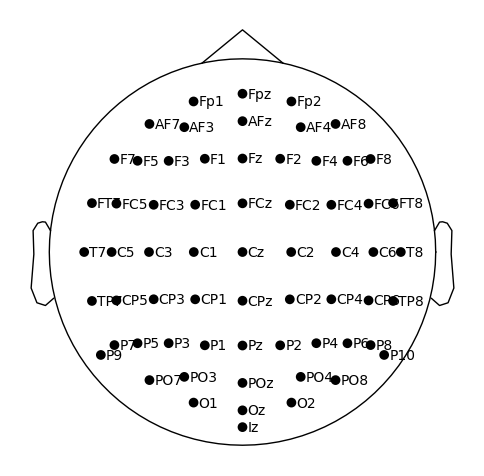

In [5]:
# Plot the montage with adjusted font size
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
mne.viz.plot_montage(jr_sim.montage, scale_factor=20, axes=ax, show_names=True)

fig.savefig('montage_plot.png', dpi=300, bbox_inches='tight')

### Run an example of simulation

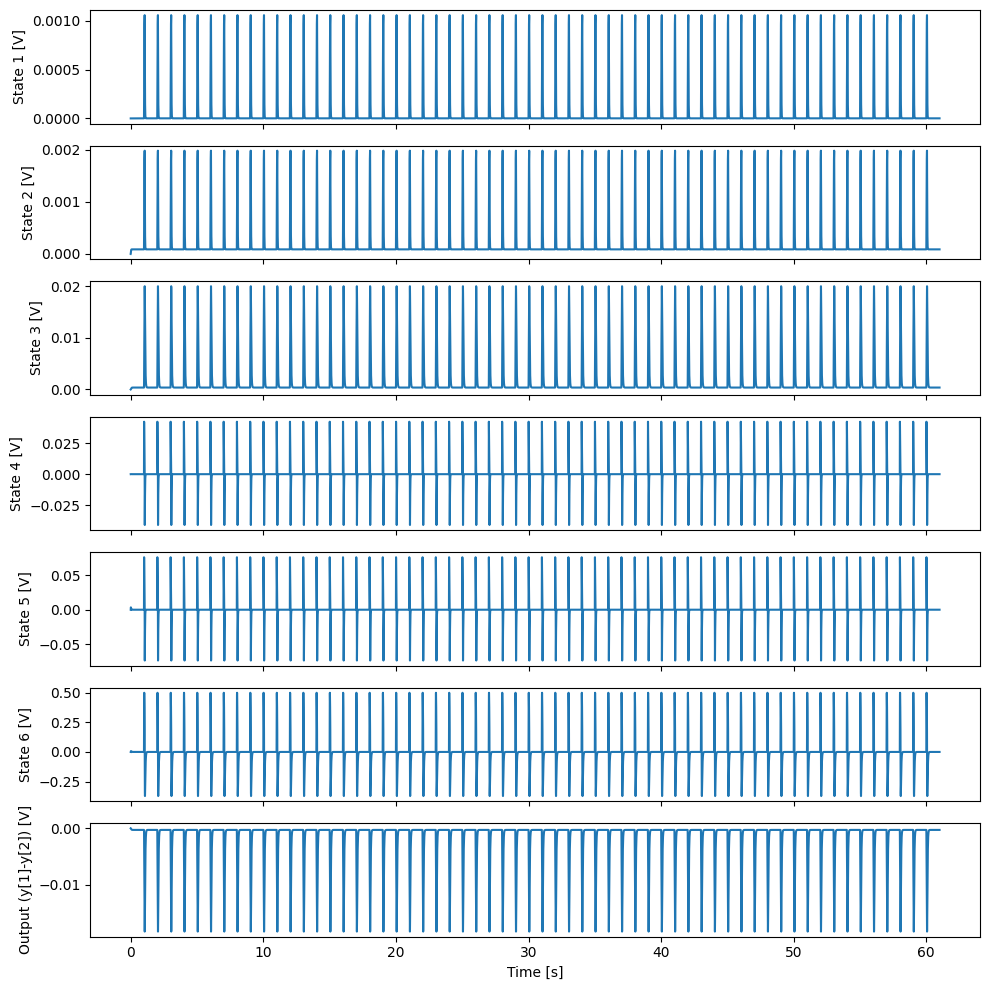

In [6]:
jr_sim.run_simulation(er_exp, parameters, jr_noise_sd=0.0)
jr_sim.plot_jr_results();

Reading labels from parcellation...
   read 1 labels from /Users/deepatilwani/mne_data/MNE-sample-data/subjects/fsaverage/label/lh.aparc.annot
   read 0 labels from /Users/deepatilwani/mne_data/MNE-sample-data/subjects/fsaverage/label/rh.aparc.annot
Setting up raw simulation: 1 position, "cos2" interpolation
Event information not stored
    Interval 0.000–1.000 s
Setting up forward solutions
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interva

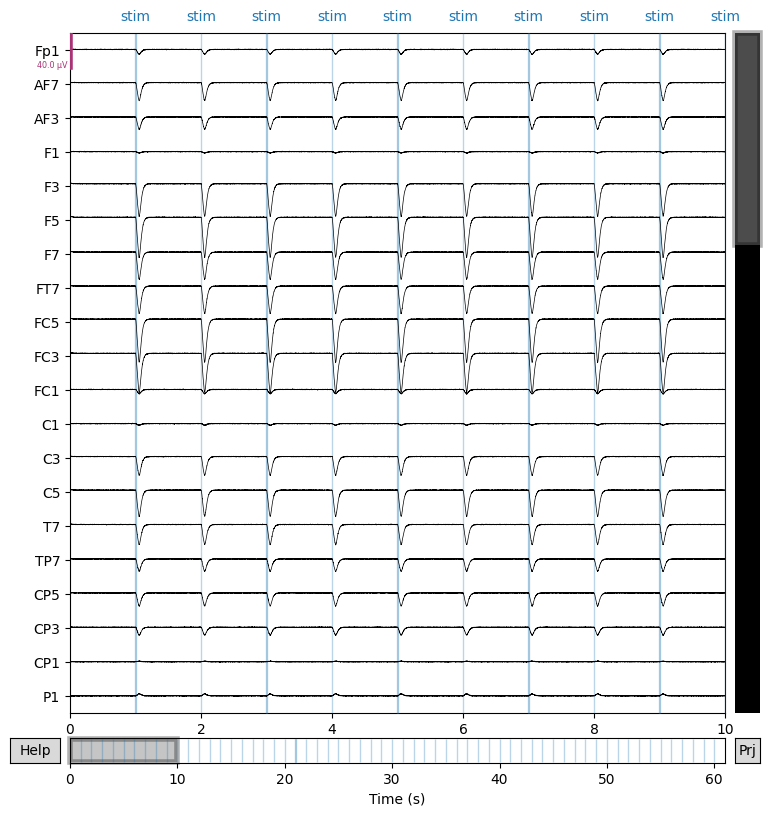

In [ ]:
noise_fact = 1 #for checking simulations working 

jr_sim.generate_raw(seed=0, noise_fact=noise_fact)
jr_sim.raw.plot();

Not setting metadata
60 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated


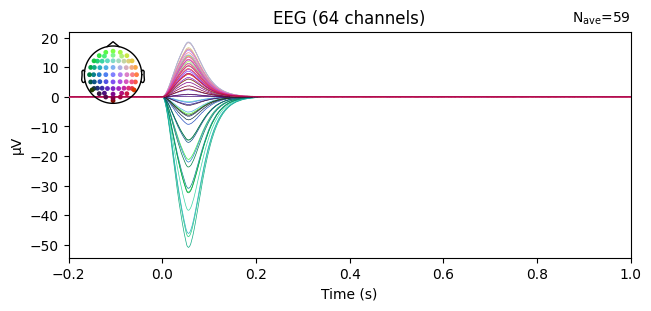

In [8]:
jr_sim.generate_evoked(er_exp)
jr_sim.evoked.plot();

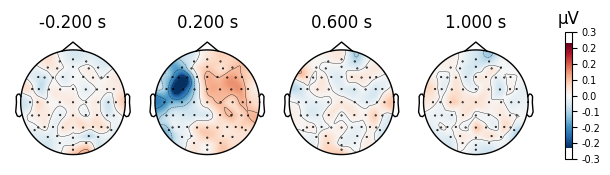

In [9]:
jr_sim.evoked.plot_topomap();

## EEG simulations

In [10]:


base_path = Path('deepjr_training_data')
base_path.mkdir(exist_ok=True)
method = 'normal'  # normal distribution of parameters
nb_sims = 1000
noise_factors = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
recompute = False

sim_results = SimResults(nb_sims, noise_factors, base_path)

if not sim_results.full_path.exists() or recompute:
    # Simulation per parameter calling the function
    mne.set_log_level(verbose=False)
    for noise_fact in noise_factors:
        jr_sim.simulate_for_parameter(er_exp, method=method, 
                                      nb_sims=nb_sims, noise_fact=noise_fact,
                                      base_path=base_path, use_tqdm=True)


  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:163: RuntimeWarning: overflow encountered in exp
  y[4, ii] = y[4, ii - 1] + dt * (kA * ka * A * a * (p[ii - 1] + Ip[ii - 1] + C2 * vm / (1 + np.exp(r * (v0 - C1 * y[0, ii - 1])))) - 2 * ka * a * y[4, ii - 1] - ka**2 * a**2 * y[1, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:162: RuntimeWarning: overflow encountered in exp
  y[3, ii] = y[3, ii - 1] + dt * (A * a * (Ii[ii - 1] + vm / (1 + np.exp(r * (v0 - (y[1, ii - 1] - y[2, ii - 1]))))) - 2 * a * y[3, ii - 1] - a**2 * y[0, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:164: RuntimeWarning: overflow encountered in exp
  y[5, ii] = y[5, ii - 1] + dt * (B * b * (Ip[ii - 1] + C4 * vm / (1 + np.exp(r * (v0 - C3 * y[0, ii - 1])))) - 2 * b * y[5, ii - 1] - b**2 * y[2, ii - 1])
/Users/

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:163: RuntimeWarning: overflow encountered in exp
  y[4, ii] = y[4, ii - 1] + dt * (kA * ka * A * a * (p[ii - 1] + Ip[ii - 1] + C2 * vm / (1 + np.exp(r * (v0 - C1 * y[0, ii - 1])))) - 2 * ka * a * y[4, ii - 1] - ka**2 * a**2 * y[1, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:162: RuntimeWarning: overflow encountered in exp
  y[3, ii] = y[3, ii - 1] + dt * (A * a * (Ii[ii - 1] + vm / (1 + np.exp(r * (v0 - (y[1, ii - 1] - y[2, ii - 1]))))) - 2 * a * y[3, ii - 1] - a**2 * y[0, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:164: RuntimeWarning: overflow encountered in exp
  y[5, ii] = y[5, ii - 1] + dt * (B * b * (Ip[ii - 1] + C4 * vm / (1 + np.exp(r * (v0 - C3 * y[0, ii - 1])))) - 2 * b * y[5, ii - 1] - b**2 * y[2, ii - 1])
/Users/

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:163: RuntimeWarning: overflow encountered in exp
  y[4, ii] = y[4, ii - 1] + dt * (kA * ka * A * a * (p[ii - 1] + Ip[ii - 1] + C2 * vm / (1 + np.exp(r * (v0 - C1 * y[0, ii - 1])))) - 2 * ka * a * y[4, ii - 1] - ka**2 * a**2 * y[1, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:162: RuntimeWarning: overflow encountered in exp
  y[3, ii] = y[3, ii - 1] + dt * (A * a * (Ii[ii - 1] + vm / (1 + np.exp(r * (v0 - (y[1, ii - 1] - y[2, ii - 1]))))) - 2 * a * y[3, ii - 1] - a**2 * y[0, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:164: RuntimeWarning: overflow encountered in exp
  y[5, ii] = y[5, ii - 1] + dt * (B * b * (Ip[ii - 1] + C4 * vm / (1 + np.exp(r * (v0 - C3 * y[0, ii - 1])))) - 2 * b * y[5, ii - 1] - b**2 * y[2, ii - 1])
/Users/

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:163: RuntimeWarning: overflow encountered in exp
  y[4, ii] = y[4, ii - 1] + dt * (kA * ka * A * a * (p[ii - 1] + Ip[ii - 1] + C2 * vm / (1 + np.exp(r * (v0 - C1 * y[0, ii - 1])))) - 2 * ka * a * y[4, ii - 1] - ka**2 * a**2 * y[1, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:162: RuntimeWarning: overflow encountered in exp
  y[3, ii] = y[3, ii - 1] + dt * (A * a * (Ii[ii - 1] + vm / (1 + np.exp(r * (v0 - (y[1, ii - 1] - y[2, ii - 1]))))) - 2 * a * y[3, ii - 1] - a**2 * y[0, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:164: RuntimeWarning: overflow encountered in exp
  y[5, ii] = y[5, ii - 1] + dt * (B * b * (Ip[ii - 1] + C4 * vm / (1 + np.exp(r * (v0 - C3 * y[0, ii - 1])))) - 2 * b * y[5, ii - 1] - b**2 * y[2, ii - 1])
/Users/

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:163: RuntimeWarning: overflow encountered in exp
  y[4, ii] = y[4, ii - 1] + dt * (kA * ka * A * a * (p[ii - 1] + Ip[ii - 1] + C2 * vm / (1 + np.exp(r * (v0 - C1 * y[0, ii - 1])))) - 2 * ka * a * y[4, ii - 1] - ka**2 * a**2 * y[1, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:162: RuntimeWarning: overflow encountered in exp
  y[3, ii] = y[3, ii - 1] + dt * (A * a * (Ii[ii - 1] + vm / (1 + np.exp(r * (v0 - (y[1, ii - 1] - y[2, ii - 1]))))) - 2 * a * y[3, ii - 1] - a**2 * y[0, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:164: RuntimeWarning: overflow encountered in exp
  y[5, ii] = y[5, ii - 1] + dt * (B * b * (Ip[ii - 1] + C4 * vm / (1 + np.exp(r * (v0 - C3 * y[0, ii - 1])))) - 2 * b * y[5, ii - 1] - b**2 * y[2, ii - 1])
/Users/

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:163: RuntimeWarning: overflow encountered in exp
  y[4, ii] = y[4, ii - 1] + dt * (kA * ka * A * a * (p[ii - 1] + Ip[ii - 1] + C2 * vm / (1 + np.exp(r * (v0 - C1 * y[0, ii - 1])))) - 2 * ka * a * y[4, ii - 1] - ka**2 * a**2 * y[1, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:162: RuntimeWarning: overflow encountered in exp
  y[3, ii] = y[3, ii - 1] + dt * (A * a * (Ii[ii - 1] + vm / (1 + np.exp(r * (v0 - (y[1, ii - 1] - y[2, ii - 1]))))) - 2 * a * y[3, ii - 1] - a**2 * y[0, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:164: RuntimeWarning: overflow encountered in exp
  y[5, ii] = y[5, ii - 1] + dt * (B * b * (Ip[ii - 1] + C4 * vm / (1 + np.exp(r * (v0 - C3 * y[0, ii - 1])))) - 2 * b * y[5, ii - 1] - b**2 * y[2, ii - 1])
/Users/

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:163: RuntimeWarning: overflow encountered in exp
  y[4, ii] = y[4, ii - 1] + dt * (kA * ka * A * a * (p[ii - 1] + Ip[ii - 1] + C2 * vm / (1 + np.exp(r * (v0 - C1 * y[0, ii - 1])))) - 2 * ka * a * y[4, ii - 1] - ka**2 * a**2 * y[1, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:162: RuntimeWarning: overflow encountered in exp
  y[3, ii] = y[3, ii - 1] + dt * (A * a * (Ii[ii - 1] + vm / (1 + np.exp(r * (v0 - (y[1, ii - 1] - y[2, ii - 1]))))) - 2 * a * y[3, ii - 1] - a**2 * y[0, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:164: RuntimeWarning: overflow encountered in exp
  y[5, ii] = y[5, ii - 1] + dt * (B * b * (Ip[ii - 1] + C4 * vm / (1 + np.exp(r * (v0 - C3 * y[0, ii - 1])))) - 2 * b * y[5, ii - 1] - b**2 * y[2, ii - 1])
/Users/

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:163: RuntimeWarning: overflow encountered in exp
  y[4, ii] = y[4, ii - 1] + dt * (kA * ka * A * a * (p[ii - 1] + Ip[ii - 1] + C2 * vm / (1 + np.exp(r * (v0 - C1 * y[0, ii - 1])))) - 2 * ka * a * y[4, ii - 1] - ka**2 * a**2 * y[1, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:162: RuntimeWarning: overflow encountered in exp
  y[3, ii] = y[3, ii - 1] + dt * (A * a * (Ii[ii - 1] + vm / (1 + np.exp(r * (v0 - (y[1, ii - 1] - y[2, ii - 1]))))) - 2 * a * y[3, ii - 1] - a**2 * y[0, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:164: RuntimeWarning: overflow encountered in exp
  y[5, ii] = y[5, ii - 1] + dt * (B * b * (Ip[ii - 1] + C4 * vm / (1 + np.exp(r * (v0 - C3 * y[0, ii - 1])))) - 2 * b * y[5, ii - 1] - b**2 * y[2, ii - 1])
/Users/

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:163: RuntimeWarning: overflow encountered in exp
  y[4, ii] = y[4, ii - 1] + dt * (kA * ka * A * a * (p[ii - 1] + Ip[ii - 1] + C2 * vm / (1 + np.exp(r * (v0 - C1 * y[0, ii - 1])))) - 2 * ka * a * y[4, ii - 1] - ka**2 * a**2 * y[1, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:162: RuntimeWarning: overflow encountered in exp
  y[3, ii] = y[3, ii - 1] + dt * (A * a * (Ii[ii - 1] + vm / (1 + np.exp(r * (v0 - (y[1, ii - 1] - y[2, ii - 1]))))) - 2 * a * y[3, ii - 1] - a**2 * y[0, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:164: RuntimeWarning: overflow encountered in exp
  y[5, ii] = y[5, ii - 1] + dt * (B * b * (Ip[ii - 1] + C4 * vm / (1 + np.exp(r * (v0 - C3 * y[0, ii - 1])))) - 2 * b * y[5, ii - 1] - b**2 * y[2, ii - 1])
/Users/

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:163: RuntimeWarning: overflow encountered in exp
  y[4, ii] = y[4, ii - 1] + dt * (kA * ka * A * a * (p[ii - 1] + Ip[ii - 1] + C2 * vm / (1 + np.exp(r * (v0 - C1 * y[0, ii - 1])))) - 2 * ka * a * y[4, ii - 1] - ka**2 * a**2 * y[1, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:162: RuntimeWarning: overflow encountered in exp
  y[3, ii] = y[3, ii - 1] + dt * (A * a * (Ii[ii - 1] + vm / (1 + np.exp(r * (v0 - (y[1, ii - 1] - y[2, ii - 1]))))) - 2 * a * y[3, ii - 1] - a**2 * y[0, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:164: RuntimeWarning: overflow encountered in exp
  y[5, ii] = y[5, ii - 1] + dt * (B * b * (Ip[ii - 1] + C4 * vm / (1 + np.exp(r * (v0 - C3 * y[0, ii - 1])))) - 2 * b * y[5, ii - 1] - b**2 * y[2, ii - 1])
/Users/

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:163: RuntimeWarning: overflow encountered in exp
  y[4, ii] = y[4, ii - 1] + dt * (kA * ka * A * a * (p[ii - 1] + Ip[ii - 1] + C2 * vm / (1 + np.exp(r * (v0 - C1 * y[0, ii - 1])))) - 2 * ka * a * y[4, ii - 1] - ka**2 * a**2 * y[1, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:162: RuntimeWarning: overflow encountered in exp
  y[3, ii] = y[3, ii - 1] + dt * (A * a * (Ii[ii - 1] + vm / (1 + np.exp(r * (v0 - (y[1, ii - 1] - y[2, ii - 1]))))) - 2 * a * y[3, ii - 1] - a**2 * y[0, ii - 1])
/Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/deepjr/simulation.py:164: RuntimeWarning: overflow encountered in exp
  y[5, ii] = y[5, ii - 1] + dt * (B * b * (Ip[ii - 1] + C4 * vm / (1 + np.exp(r * (v0 - C3 * y[0, ii - 1])))) - 2 * b * y[5, ii - 1] - b**2 * y[2, ii - 1])
/Users/

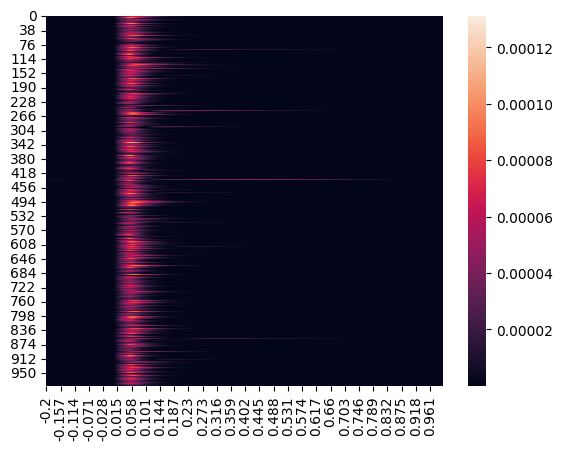

In [14]:
noise_fact=0.8
sim_results = SimResults(nb_sims, noise_fact, base_path)
sim_results.load()
sim_results.clean()
sim_results.plot_evoked_heatmap()

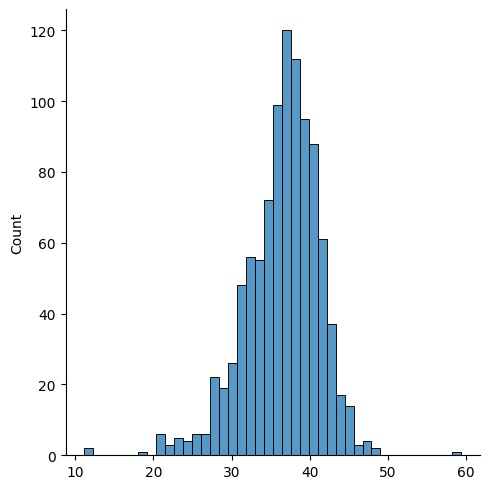

In [15]:
sns.displot(sim_results.snr)

In [12]:
noise_fact

1

Epoch [1/50], Loss: 0.2266
Epoch [2/50], Loss: 0.0308
Epoch [3/50], Loss: 0.0282
Epoch [4/50], Loss: 0.0287
Epoch [5/50], Loss: 0.0288
Epoch [6/50], Loss: 0.0293
Epoch [7/50], Loss: 0.0298
Epoch [8/50], Loss: 0.0291
Epoch [9/50], Loss: 0.0288
Epoch [10/50], Loss: 0.0298
Epoch [11/50], Loss: 0.0290
Epoch [12/50], Loss: 0.0281
Epoch [13/50], Loss: 0.0279
Epoch [14/50], Loss: 0.0263
Epoch [15/50], Loss: 0.0258
Epoch [16/50], Loss: 0.0254
Epoch [17/50], Loss: 0.0258
Epoch [18/50], Loss: 0.0263
Epoch [19/50], Loss: 0.0248
Epoch [20/50], Loss: 0.0255
Epoch [21/50], Loss: 0.0256
Epoch [22/50], Loss: 0.0245
Epoch [23/50], Loss: 0.0242
Epoch [24/50], Loss: 0.0243
Epoch [25/50], Loss: 0.0236
Epoch [26/50], Loss: 0.0231
Epoch [27/50], Loss: 0.0227
Epoch [28/50], Loss: 0.0228
Epoch [29/50], Loss: 0.0223
Epoch [30/50], Loss: 0.0224
Epoch [31/50], Loss: 0.0229
Epoch [32/50], Loss: 0.0237
Epoch [33/50], Loss: 0.0221
Epoch [34/50], Loss: 0.0229
Epoch [35/50], Loss: 0.0230
Epoch [36/50], Loss: 0.0229
E

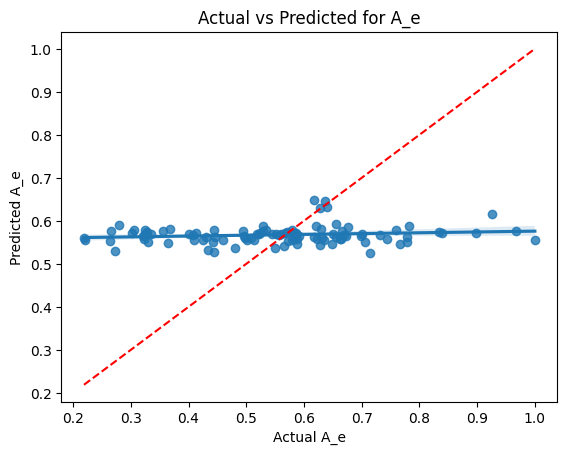

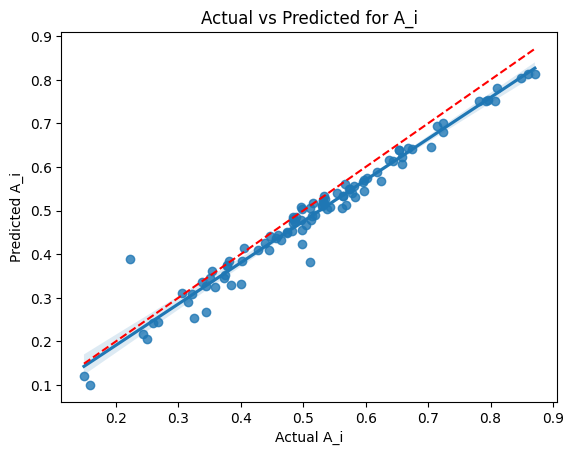

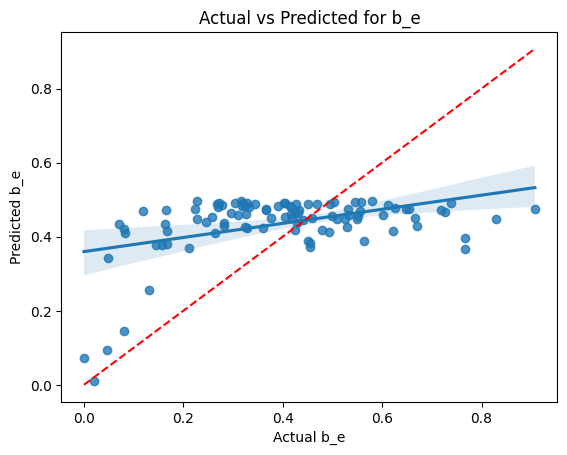

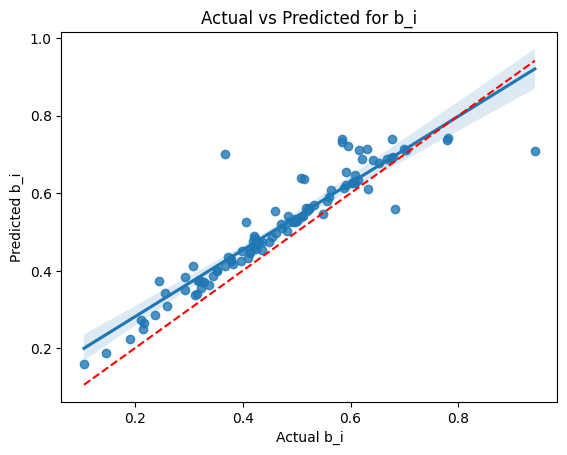

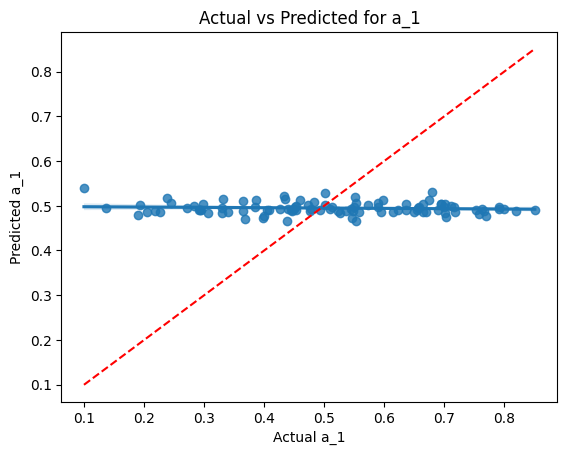

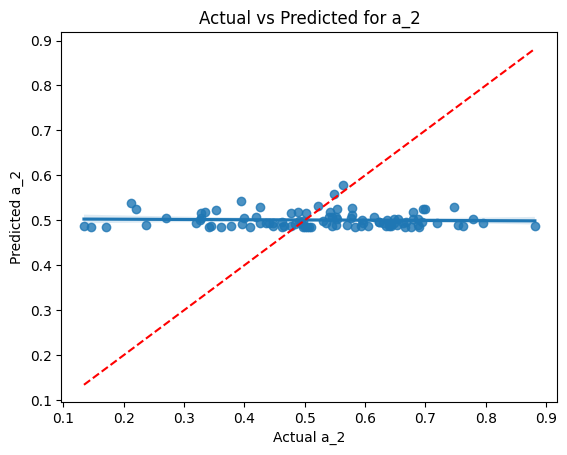

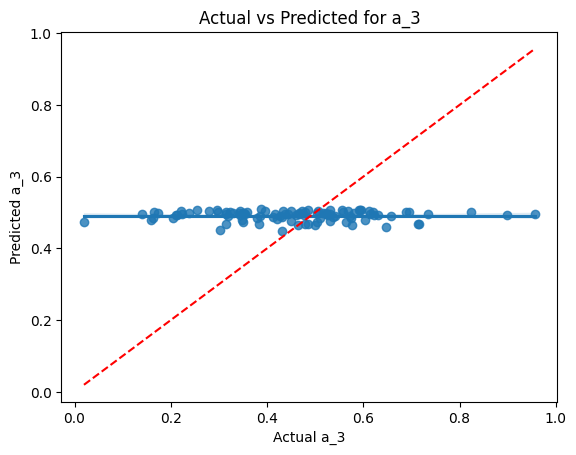

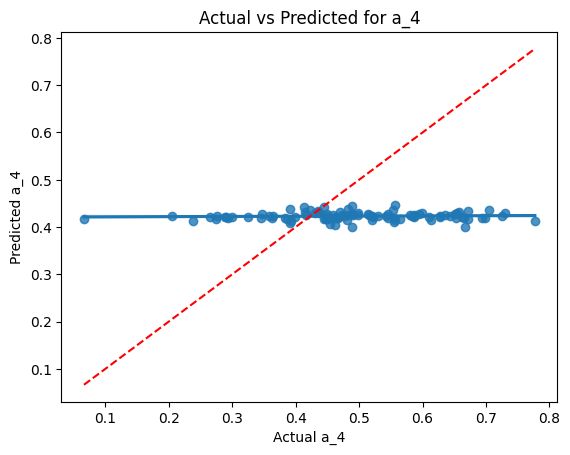

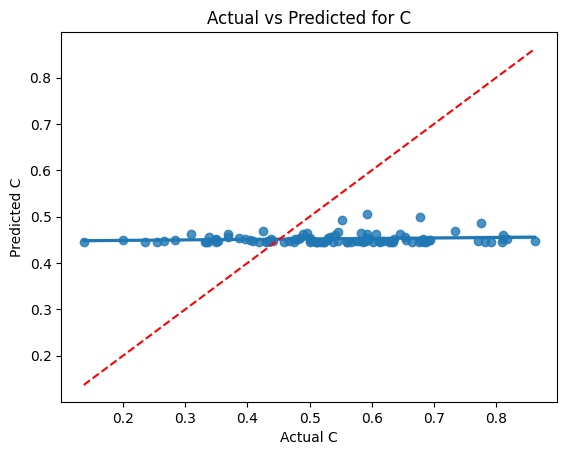

Correlation for A_e: 0.1525
Correlation for A_i: 0.9814
Correlation for b_e: 0.4351
Correlation for b_i: 0.9315
Correlation for a_1: -0.0995
Correlation for a_2: -0.0459
Correlation for a_3: -0.0001
Correlation for a_4: 0.0612
Correlation for C: 0.1410


In [16]:
# Correct the import
from deepjr.transformer import EEGTransformer, JRInvDataLoader

noise_fact = 0

path = "./deepjr_training_data"
estim_params = ('A_e', 'A_i', 'b_e', 'b_i', 'a_1', 'a_2', 'a_3', 'a_4', 'C')
nb_sims = 1000

# Initialize the Data Loader
data_loader = JRInvDataLoader(nb_sims=nb_sims, path=path, estim_params=estim_params, noise_fact=noise_fact)
data_loader.prepare_data()

# Get dimensions: assume X_train shape is (num_samples, num_channels, num_timepoints)
num_channels = data_loader.X_train.shape[1]
num_timepoints = data_loader.X_train.shape[2]

model = EEGTransformer(
    num_channels=num_channels, 
    num_timepoints=num_timepoints,
    output_dim=len(estim_params), 
    estim_params=estim_params,
    embed_dim=256,        # Increased embedding dimension
    num_heads=8,          # Increased number of attention heads (256 is divisible by 8)
    hidden_dim=128,       
    hidden_ffn_dim=512,   # Increased feed-forward network hidden dimension
    intermediate_dim=1024,# Increased intermediate dimension
    ffn_output_dim=256,   # Increased FFN output dimension
    dropout=0.2           # Slightly higher dropout for better regularization
)

# Train the model
model.train_model(data_loader.X_train, data_loader.y_train, data_loader.X_val, data_loader.y_val, epochs=50, batch_size=32)

# Evaluate the model
model.evaluate_model(data_loader.X_test, data_loader.y_test)

# Plot predictions vs. actual values
model.plot_test_regressions(data_loader.X_test, data_loader.y_test)

# Print correlations between predictions and actual values
model.print_correlations(data_loader.X_test, data_loader.y_test);

Epoch [1/50], Loss: 0.2440
Epoch [2/50], Loss: 0.0329
Epoch [3/50], Loss: 0.0284
Epoch [4/50], Loss: 0.0282
Epoch [5/50], Loss: 0.0280
Epoch [6/50], Loss: 0.0284
Epoch [7/50], Loss: 0.0283
Epoch [8/50], Loss: 0.0288
Epoch [9/50], Loss: 0.0290
Epoch [10/50], Loss: 0.0285
Epoch [11/50], Loss: 0.0287
Epoch [12/50], Loss: 0.0290
Epoch [13/50], Loss: 0.0278
Epoch [14/50], Loss: 0.0277
Epoch [15/50], Loss: 0.0268
Epoch [16/50], Loss: 0.0257
Epoch [17/50], Loss: 0.0257
Epoch [18/50], Loss: 0.0258
Epoch [19/50], Loss: 0.0257
Epoch [20/50], Loss: 0.0263
Epoch [21/50], Loss: 0.0262
Epoch [22/50], Loss: 0.0258
Epoch [23/50], Loss: 0.0250
Epoch [24/50], Loss: 0.0255
Epoch [25/50], Loss: 0.0255
Epoch [26/50], Loss: 0.0247
Epoch [27/50], Loss: 0.0237
Epoch [28/50], Loss: 0.0226
Epoch [29/50], Loss: 0.0235
Epoch [30/50], Loss: 0.0225
Epoch [31/50], Loss: 0.0227
Epoch [32/50], Loss: 0.0221
Epoch [33/50], Loss: 0.0221
Epoch [34/50], Loss: 0.0231
Epoch [35/50], Loss: 0.0224
Epoch [36/50], Loss: 0.0218
E

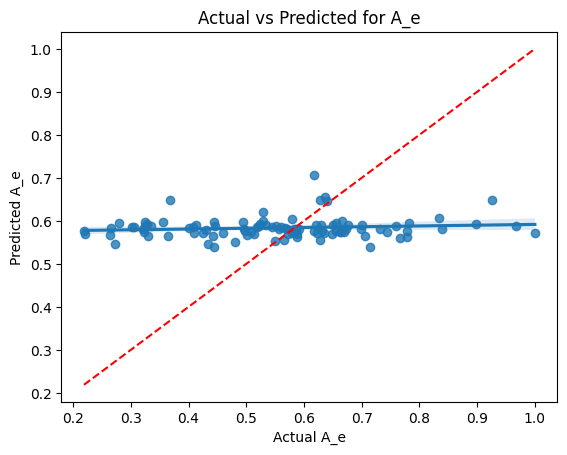

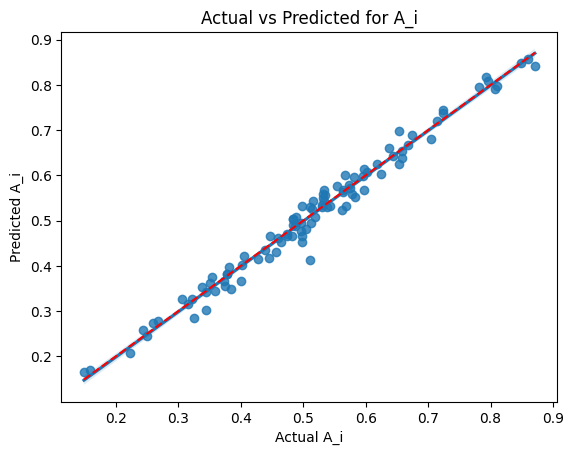

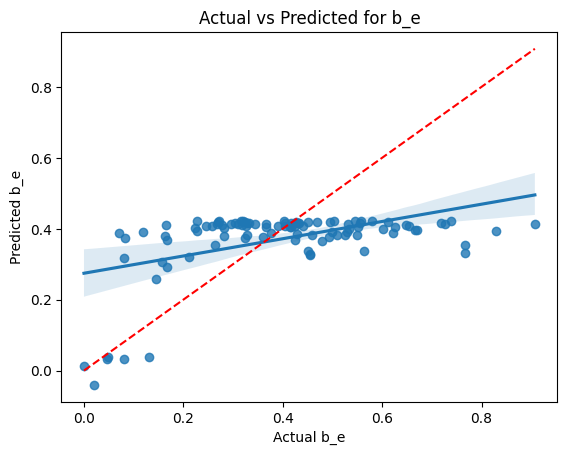

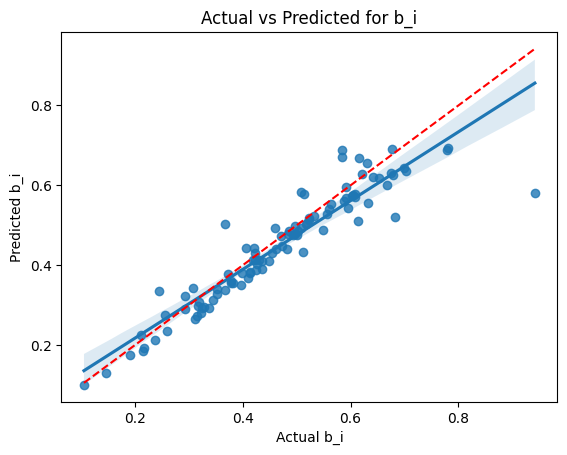

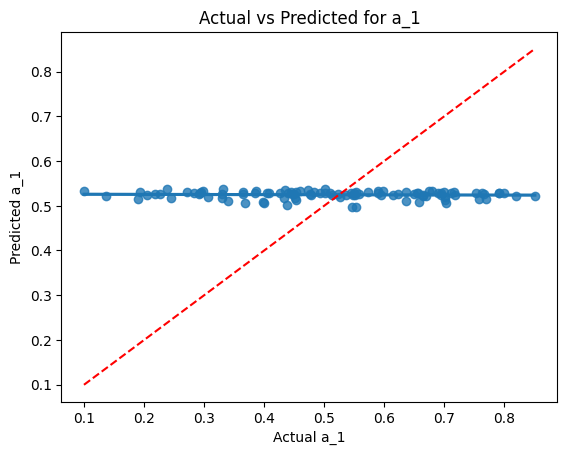

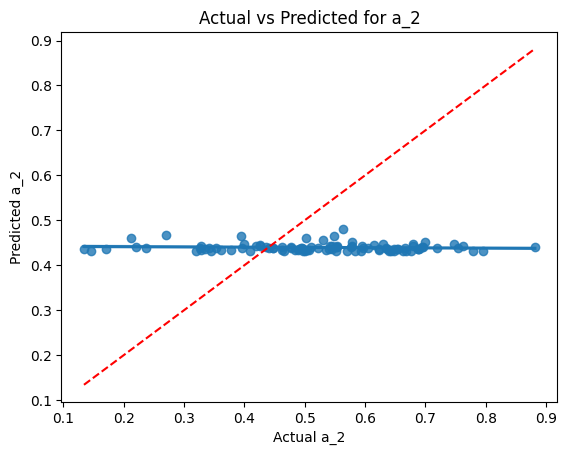

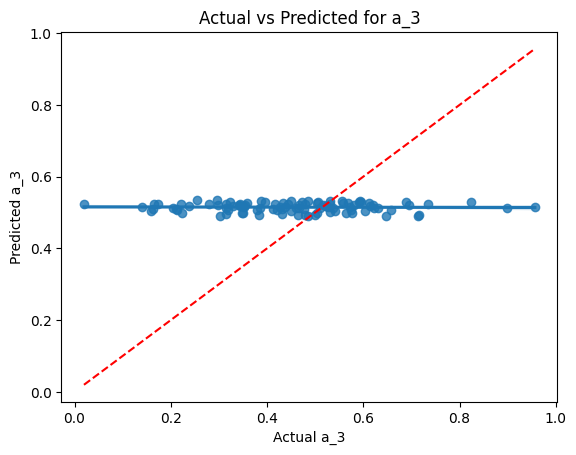

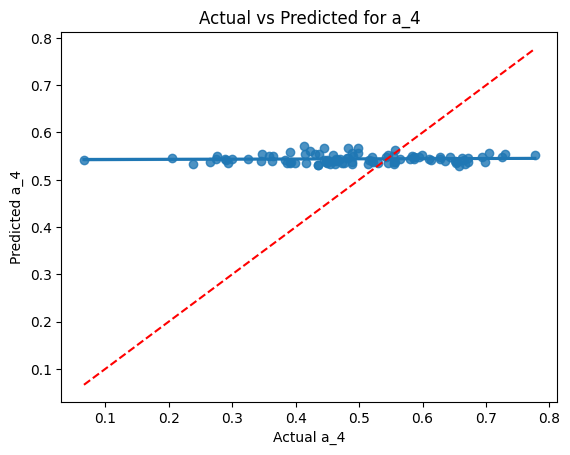

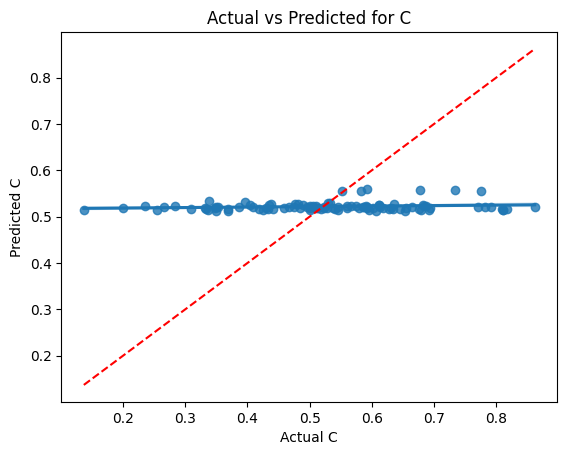

Correlation for A_e: 0.1218
Correlation for A_i: 0.9897
Correlation for b_e: 0.4922
Correlation for b_i: 0.9336
Correlation for a_1: -0.0524
Correlation for a_2: -0.0954
Correlation for a_3: -0.0267
Correlation for a_4: 0.0522
Correlation for C: 0.1615
Epoch [1/50], Loss: 0.1886
Epoch [2/50], Loss: 0.0309
Epoch [3/50], Loss: 0.0286
Epoch [4/50], Loss: 0.0284
Epoch [5/50], Loss: 0.0284
Epoch [6/50], Loss: 0.0287
Epoch [7/50], Loss: 0.0296
Epoch [8/50], Loss: 0.0291
Epoch [9/50], Loss: 0.0282
Epoch [10/50], Loss: 0.0264
Epoch [11/50], Loss: 0.0260
Epoch [12/50], Loss: 0.0253
Epoch [13/50], Loss: 0.0258
Epoch [14/50], Loss: 0.0256
Epoch [15/50], Loss: 0.0246
Epoch [16/50], Loss: 0.0237
Epoch [17/50], Loss: 0.0232
Epoch [18/50], Loss: 0.0232
Epoch [19/50], Loss: 0.0226
Epoch [20/50], Loss: 0.0233
Epoch [21/50], Loss: 0.0232
Epoch [22/50], Loss: 0.0222
Epoch [23/50], Loss: 0.0224
Epoch [24/50], Loss: 0.0229
Epoch [25/50], Loss: 0.0233
Epoch [26/50], Loss: 0.0227
Epoch [27/50], Loss: 0.0228


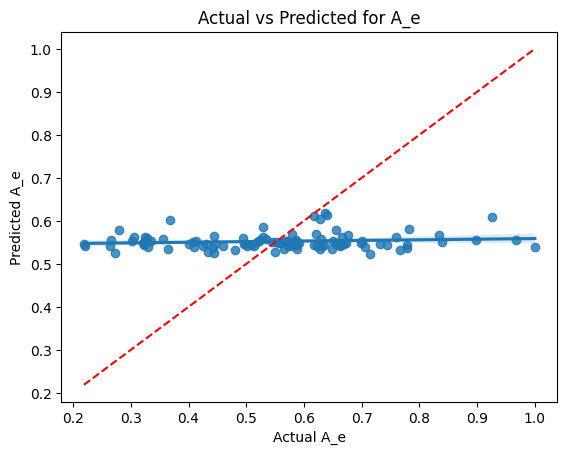

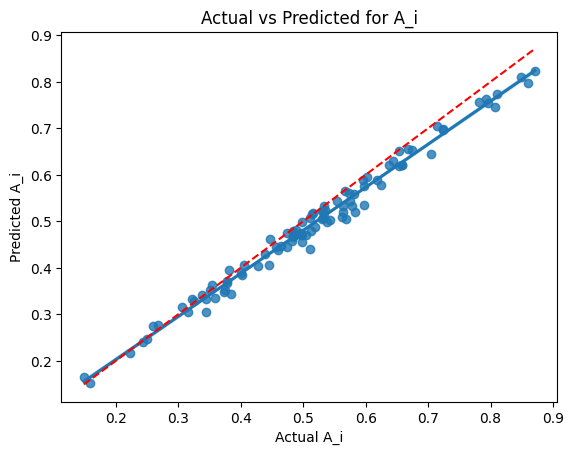

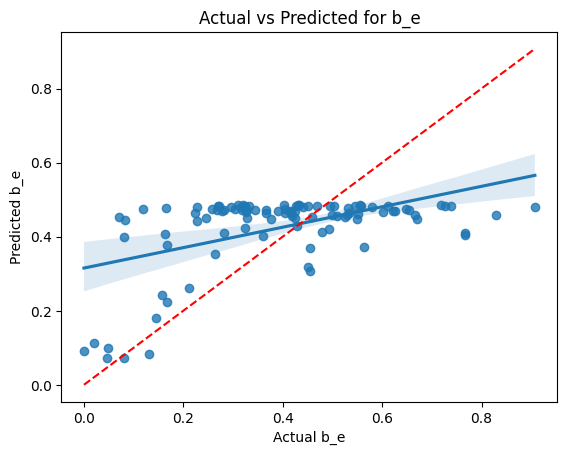

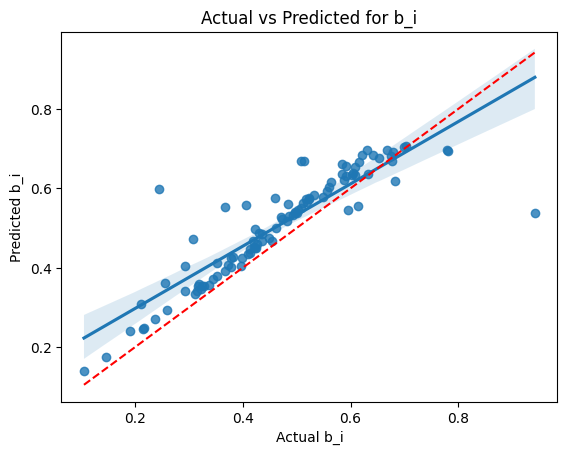

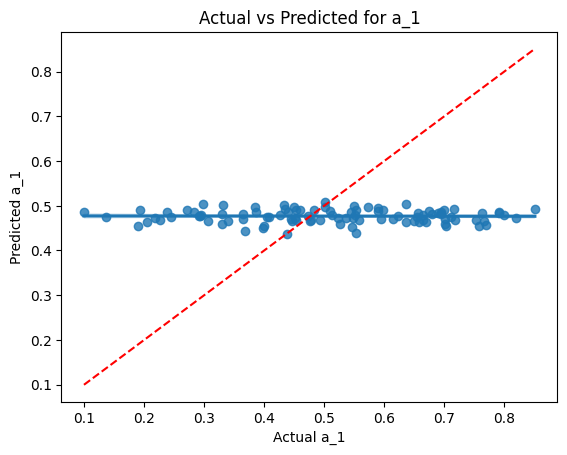

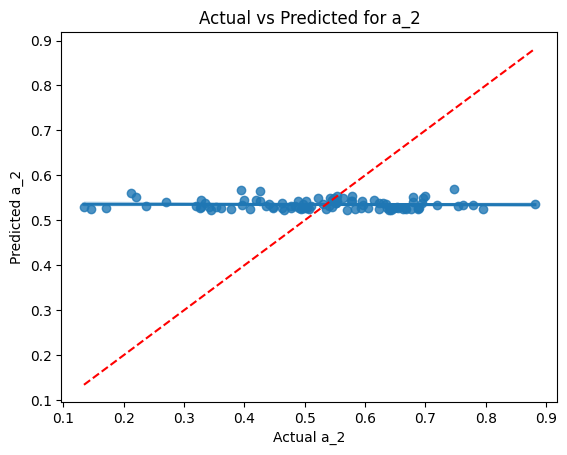

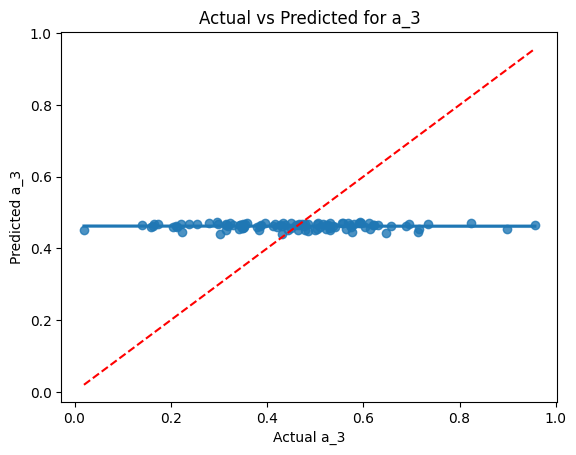

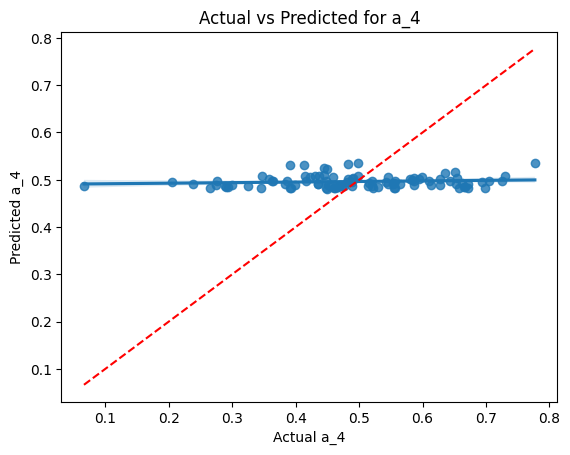

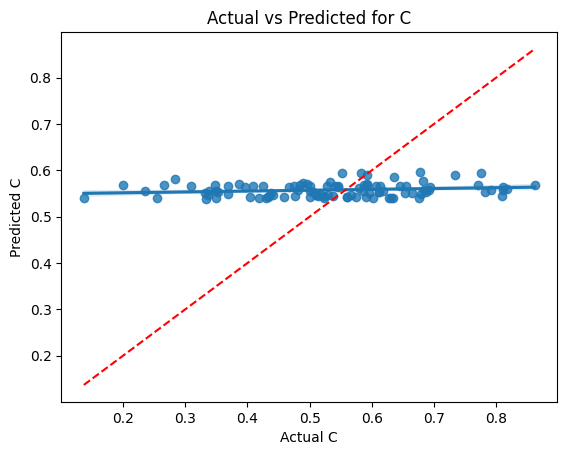

Correlation for A_e: 0.1270
Correlation for A_i: 0.9934
Correlation for b_e: 0.5150
Correlation for b_i: 0.8875
Correlation for a_1: -0.0125
Correlation for a_2: -0.0205
Correlation for a_3: -0.0085
Correlation for a_4: 0.1222
Correlation for C: 0.1913
Epoch [1/50], Loss: 0.2521
Epoch [2/50], Loss: 0.0311
Epoch [3/50], Loss: 0.0286
Epoch [4/50], Loss: 0.0282
Epoch [5/50], Loss: 0.0293
Epoch [6/50], Loss: 0.0279
Epoch [7/50], Loss: 0.0285
Epoch [8/50], Loss: 0.0288
Epoch [9/50], Loss: 0.0292
Epoch [10/50], Loss: 0.0302
Epoch [11/50], Loss: 0.0283
Epoch [12/50], Loss: 0.0264
Epoch [13/50], Loss: 0.0264
Epoch [14/50], Loss: 0.0265
Epoch [15/50], Loss: 0.0261
Epoch [16/50], Loss: 0.0263
Epoch [17/50], Loss: 0.0252
Epoch [18/50], Loss: 0.0250
Epoch [19/50], Loss: 0.0238
Epoch [20/50], Loss: 0.0233
Epoch [21/50], Loss: 0.0236
Epoch [22/50], Loss: 0.0229
Epoch [23/50], Loss: 0.0227
Epoch [24/50], Loss: 0.0224
Epoch [25/50], Loss: 0.0227
Epoch [26/50], Loss: 0.0221
Epoch [27/50], Loss: 0.0220


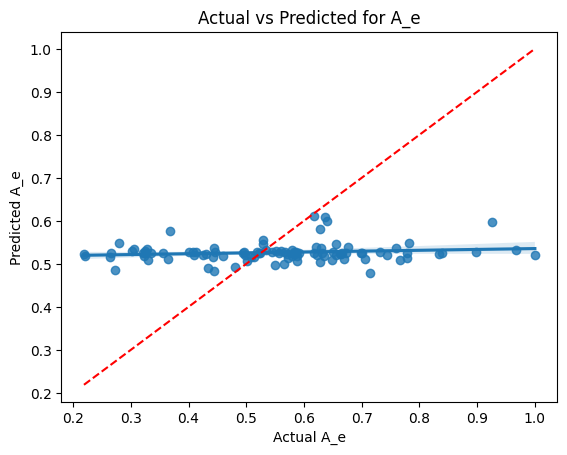

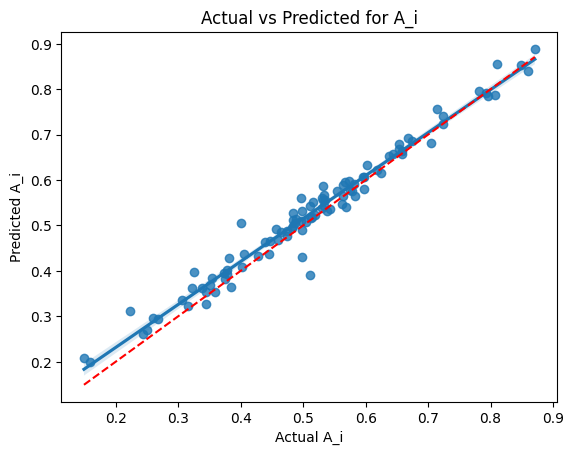

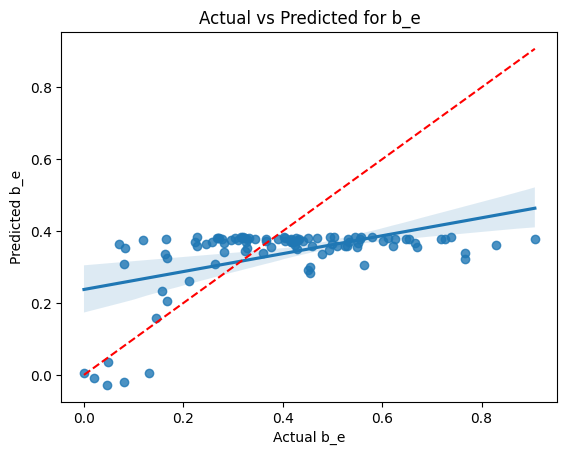

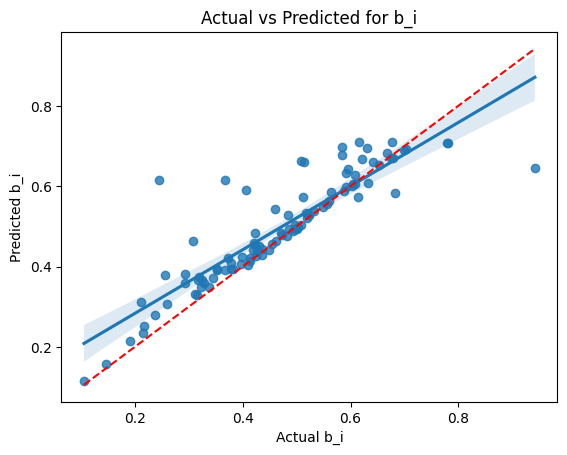

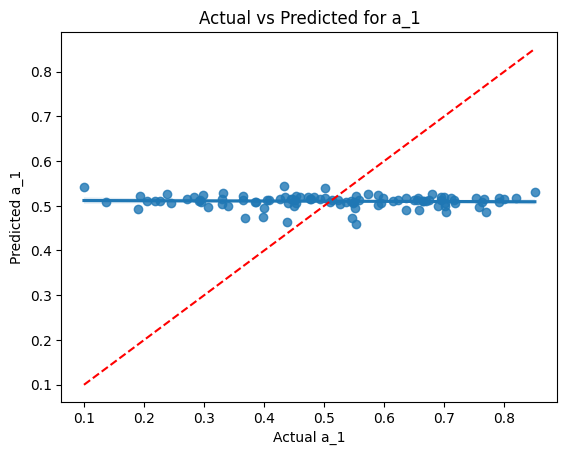

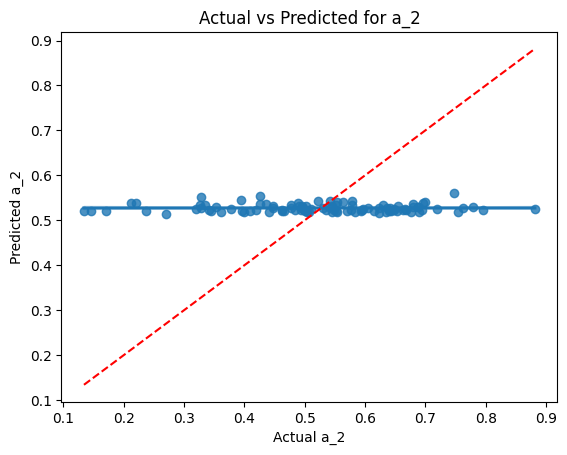

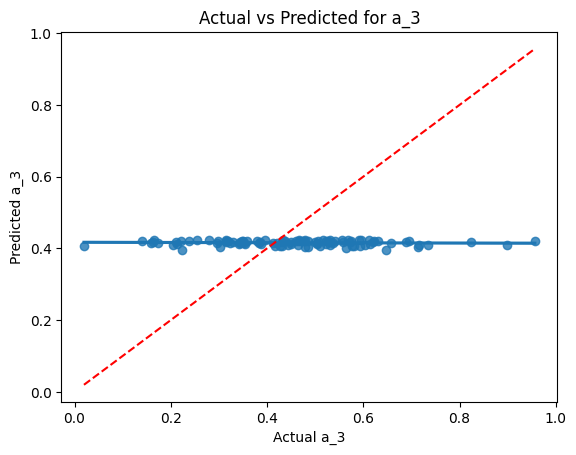

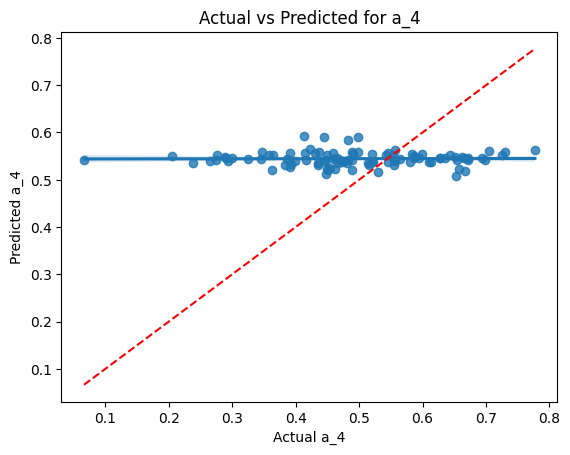

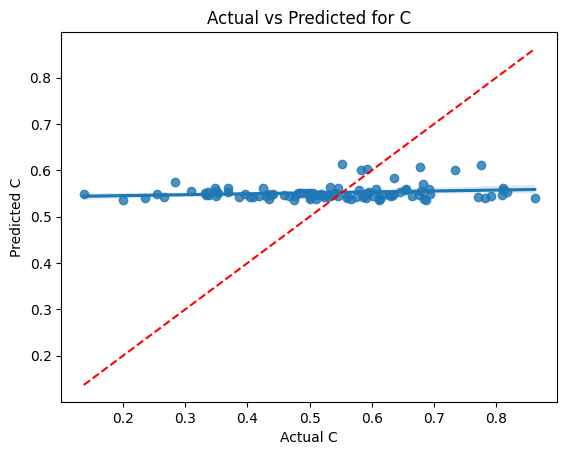

Correlation for A_e: 0.1506
Correlation for A_i: 0.9838
Correlation for b_e: 0.5107
Correlation for b_i: 0.8904
Correlation for a_1: -0.0460
Correlation for a_2: 0.0018
Correlation for a_3: -0.0694
Correlation for a_4: 0.0115
Correlation for C: 0.1859
Epoch [1/50], Loss: 0.2823
Epoch [2/50], Loss: 0.0300
Epoch [3/50], Loss: 0.0280
Epoch [4/50], Loss: 0.0284
Epoch [5/50], Loss: 0.0283
Epoch [6/50], Loss: 0.0287
Epoch [7/50], Loss: 0.0287
Epoch [8/50], Loss: 0.0294
Epoch [9/50], Loss: 0.0284
Epoch [10/50], Loss: 0.0284
Epoch [11/50], Loss: 0.0276
Epoch [12/50], Loss: 0.0261
Epoch [13/50], Loss: 0.0258
Epoch [14/50], Loss: 0.0267
Epoch [15/50], Loss: 0.0261
Epoch [16/50], Loss: 0.0259
Epoch [17/50], Loss: 0.0255
Epoch [18/50], Loss: 0.0242
Epoch [19/50], Loss: 0.0238
Epoch [20/50], Loss: 0.0233
Epoch [21/50], Loss: 0.0233
Epoch [22/50], Loss: 0.0232
Epoch [23/50], Loss: 0.0229
Epoch [24/50], Loss: 0.0226
Epoch [25/50], Loss: 0.0231
Epoch [26/50], Loss: 0.0233
Epoch [27/50], Loss: 0.0228
E

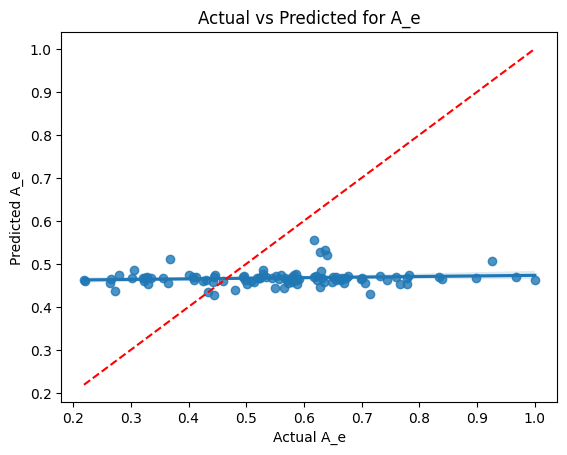

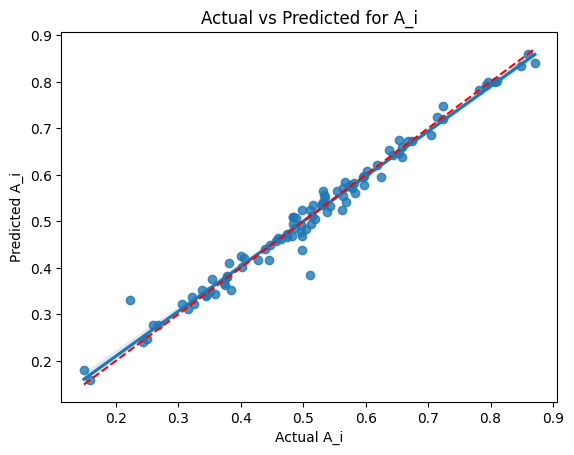

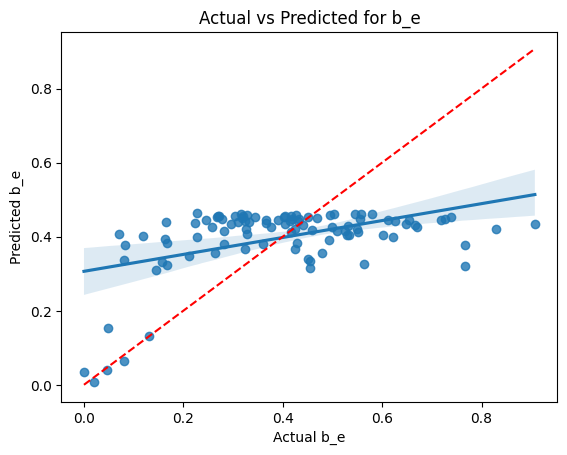

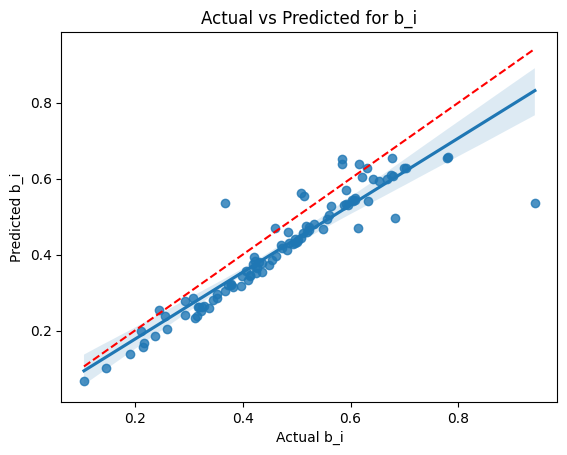

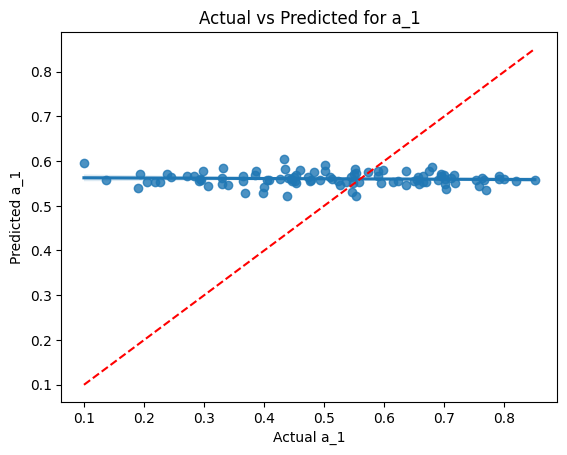

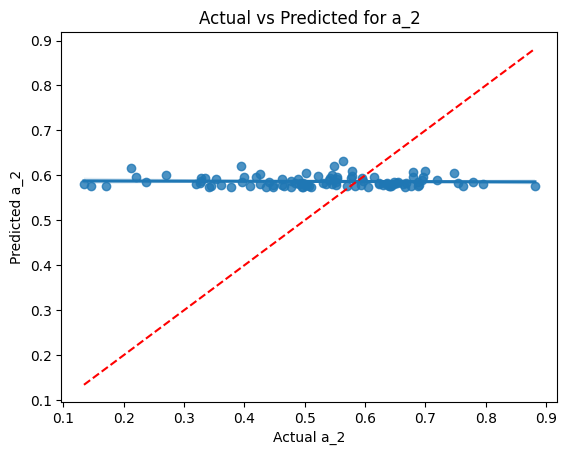

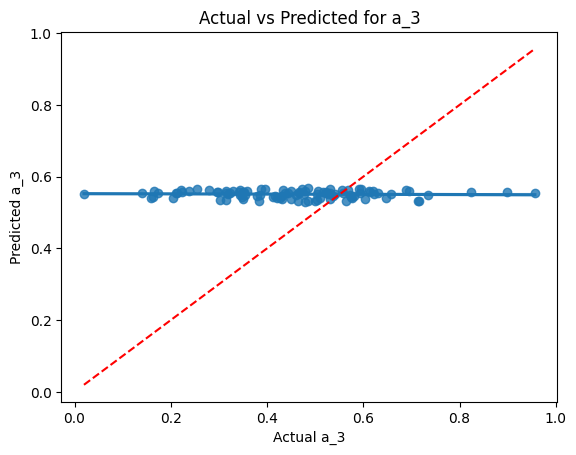

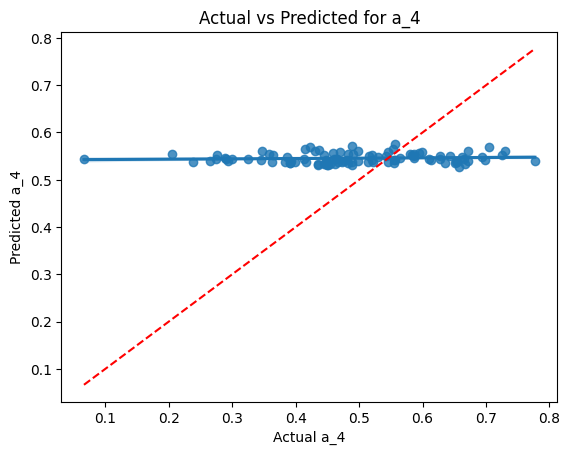

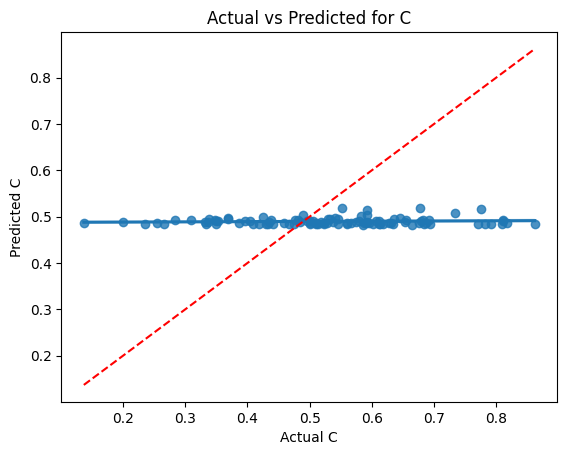

Correlation for A_e: 0.1232
Correlation for A_i: 0.9882
Correlation for b_e: 0.4741
Correlation for b_i: 0.9317
Correlation for a_1: -0.0650
Correlation for a_2: -0.0355
Correlation for a_3: -0.0500
Correlation for a_4: 0.0881
Correlation for C: 0.0918
Epoch [1/50], Loss: 0.2021
Epoch [2/50], Loss: 0.0298
Epoch [3/50], Loss: 0.0284
Epoch [4/50], Loss: 0.0285
Epoch [5/50], Loss: 0.0289
Epoch [6/50], Loss: 0.0292
Epoch [7/50], Loss: 0.0288
Epoch [8/50], Loss: 0.0295
Epoch [9/50], Loss: 0.0286
Epoch [10/50], Loss: 0.0286
Epoch [11/50], Loss: 0.0261
Epoch [12/50], Loss: 0.0260
Epoch [13/50], Loss: 0.0262
Epoch [14/50], Loss: 0.0260
Epoch [15/50], Loss: 0.0261
Epoch [16/50], Loss: 0.0257
Epoch [17/50], Loss: 0.0254
Epoch [18/50], Loss: 0.0269
Epoch [19/50], Loss: 0.0256
Epoch [20/50], Loss: 0.0256
Epoch [21/50], Loss: 0.0245
Epoch [22/50], Loss: 0.0235
Epoch [23/50], Loss: 0.0230
Epoch [24/50], Loss: 0.0227
Epoch [25/50], Loss: 0.0228
Epoch [26/50], Loss: 0.0233
Epoch [27/50], Loss: 0.0226


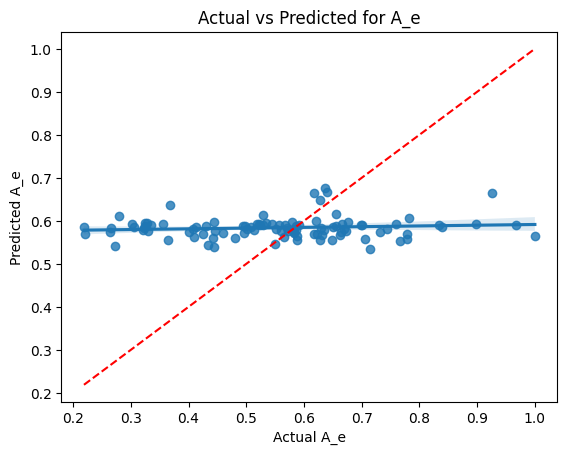

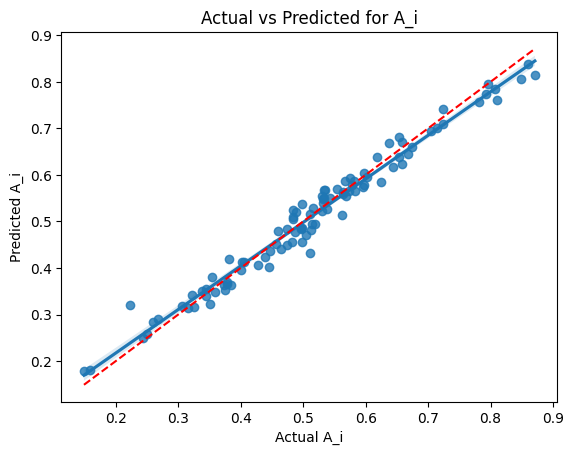

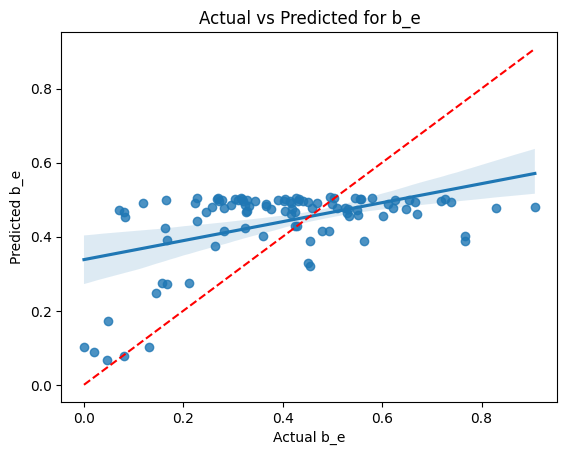

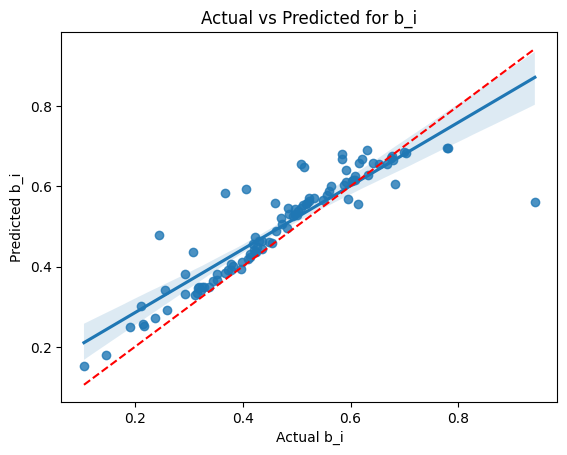

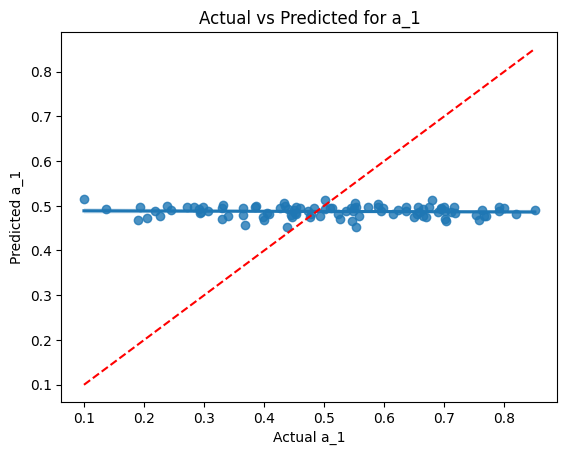

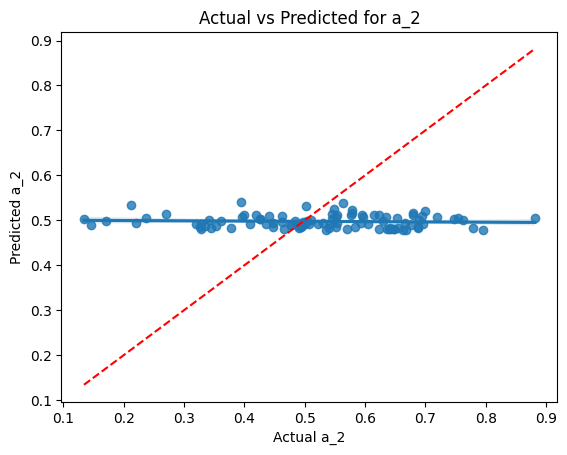

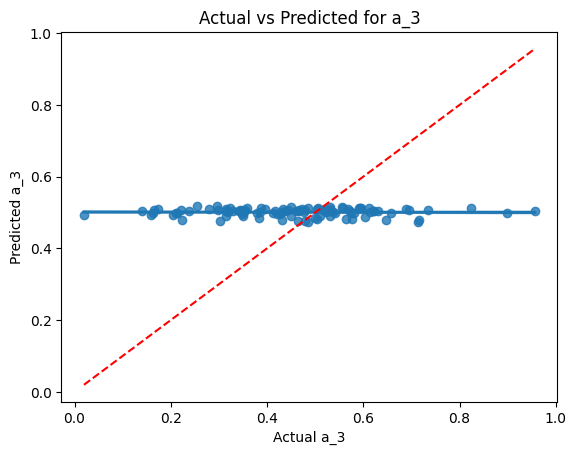

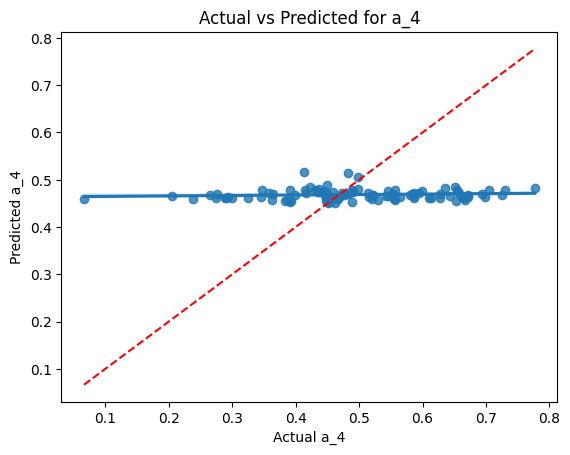

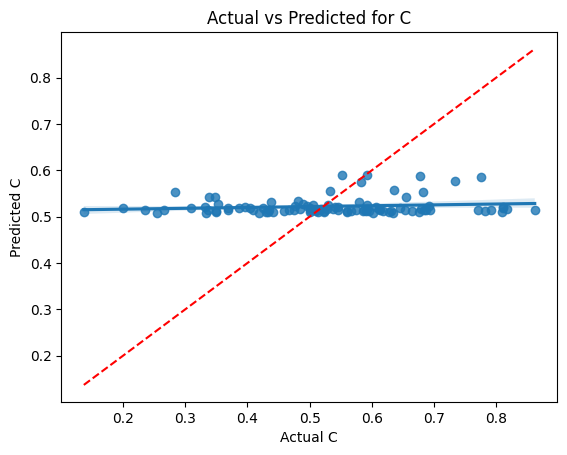

Correlation for A_e: 0.1121
Correlation for A_i: 0.9865
Correlation for b_e: 0.4816
Correlation for b_i: 0.9069
Correlation for a_1: -0.0501
Correlation for a_2: -0.0640
Correlation for a_3: -0.0171
Correlation for a_4: 0.1087
Correlation for C: 0.1467
Epoch [1/50], Loss: 0.2018
Epoch [2/50], Loss: 0.0307
Epoch [3/50], Loss: 0.0288
Epoch [4/50], Loss: 0.0295
Epoch [5/50], Loss: 0.0290
Epoch [6/50], Loss: 0.0293
Epoch [7/50], Loss: 0.0290
Epoch [8/50], Loss: 0.0292
Epoch [9/50], Loss: 0.0287
Epoch [10/50], Loss: 0.0285
Epoch [11/50], Loss: 0.0270
Epoch [12/50], Loss: 0.0253
Epoch [13/50], Loss: 0.0267
Epoch [14/50], Loss: 0.0260
Epoch [15/50], Loss: 0.0240
Epoch [16/50], Loss: 0.0239
Epoch [17/50], Loss: 0.0234
Epoch [18/50], Loss: 0.0239
Epoch [19/50], Loss: 0.0232
Epoch [20/50], Loss: 0.0227
Epoch [21/50], Loss: 0.0225
Epoch [22/50], Loss: 0.0230
Epoch [23/50], Loss: 0.0226
Epoch [24/50], Loss: 0.0231
Epoch [25/50], Loss: 0.0229
Epoch [26/50], Loss: 0.0229
Epoch [27/50], Loss: 0.0227


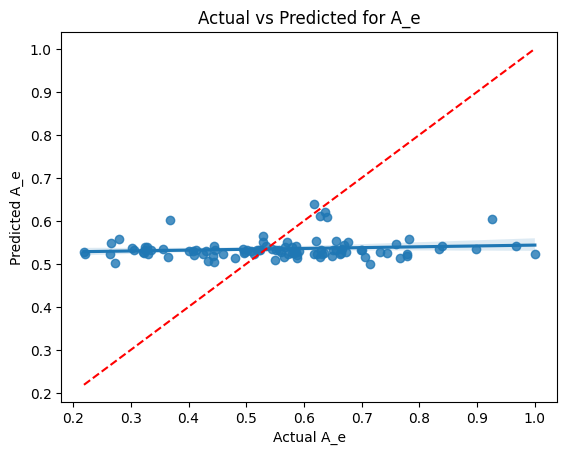

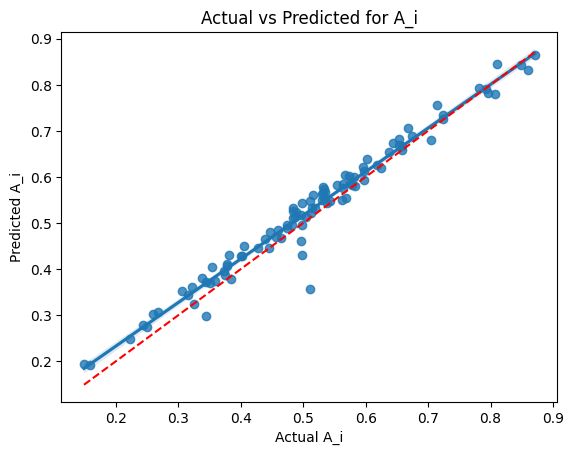

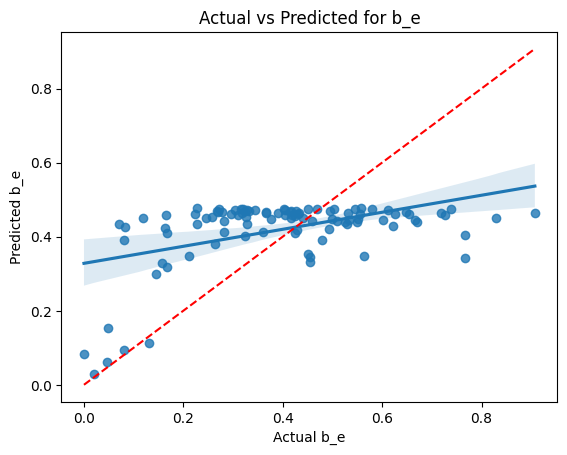

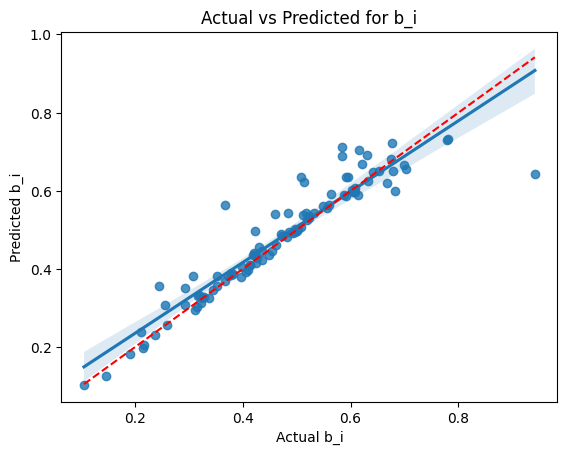

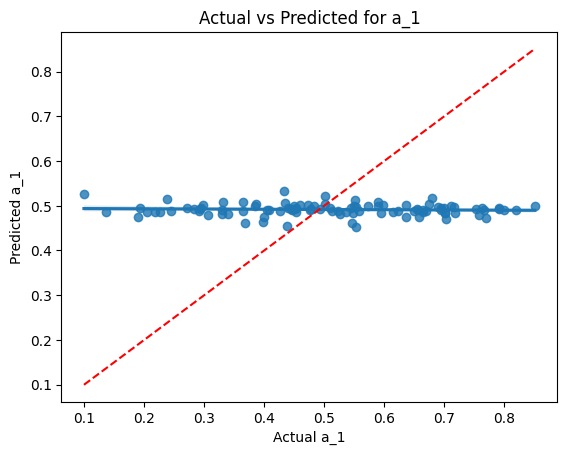

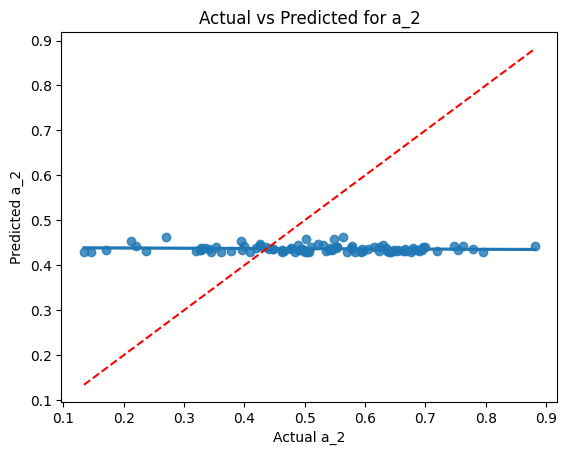

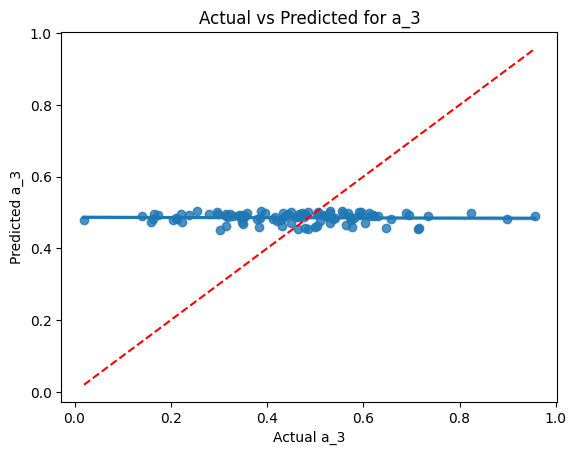

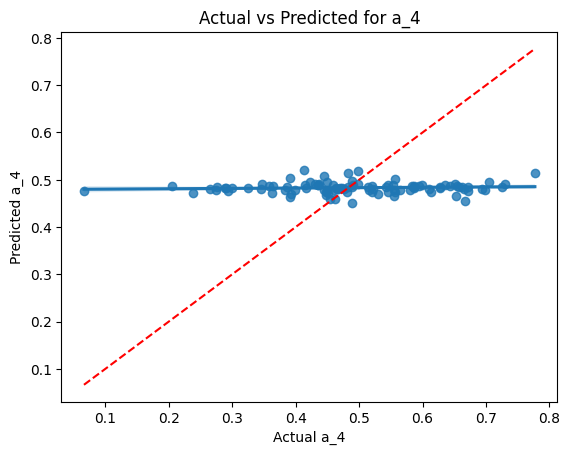

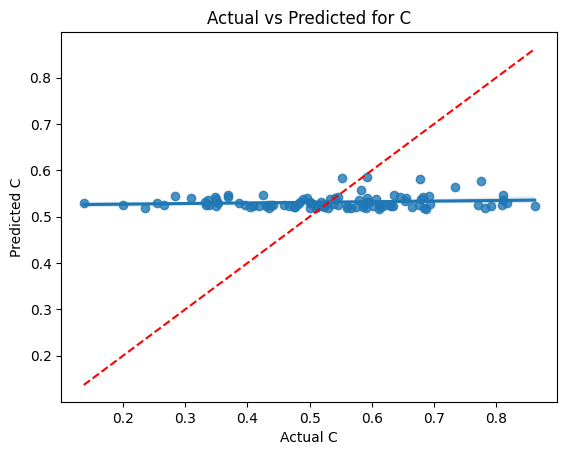

Correlation for A_e: 0.1375
Correlation for A_i: 0.9836
Correlation for b_e: 0.4731
Correlation for b_i: 0.9402
Correlation for a_1: -0.0693
Correlation for a_2: -0.1011
Correlation for a_3: -0.0340
Correlation for a_4: 0.0865
Correlation for C: 0.1388
Epoch [1/50], Loss: 0.2168
Epoch [2/50], Loss: 0.0306
Epoch [3/50], Loss: 0.0288
Epoch [4/50], Loss: 0.0284
Epoch [5/50], Loss: 0.0286
Epoch [6/50], Loss: 0.0284
Epoch [7/50], Loss: 0.0283
Epoch [8/50], Loss: 0.0289
Epoch [9/50], Loss: 0.0295
Epoch [10/50], Loss: 0.0318
Epoch [11/50], Loss: 0.0294
Epoch [12/50], Loss: 0.0279
Epoch [13/50], Loss: 0.0260
Epoch [14/50], Loss: 0.0252
Epoch [15/50], Loss: 0.0257
Epoch [16/50], Loss: 0.0252
Epoch [17/50], Loss: 0.0252
Epoch [18/50], Loss: 0.0254
Epoch [19/50], Loss: 0.0253
Epoch [20/50], Loss: 0.0250
Epoch [21/50], Loss: 0.0260
Epoch [22/50], Loss: 0.0255
Epoch [23/50], Loss: 0.0247
Epoch [24/50], Loss: 0.0240
Epoch [25/50], Loss: 0.0235
Epoch [26/50], Loss: 0.0227
Epoch [27/50], Loss: 0.0227


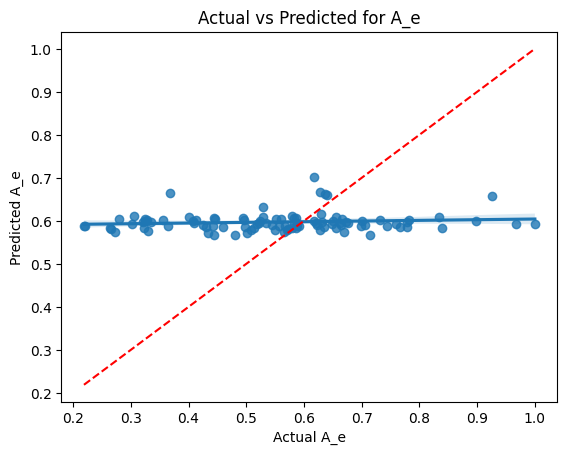

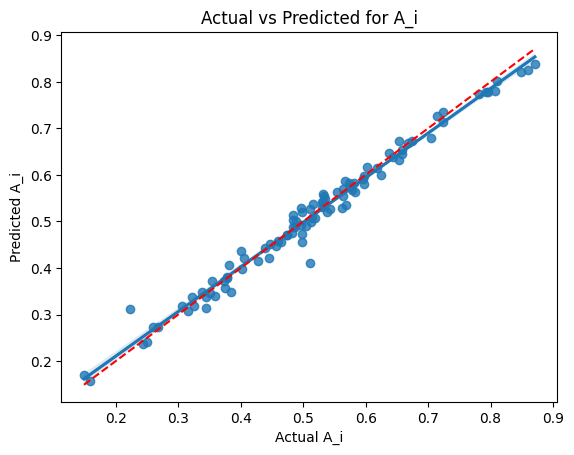

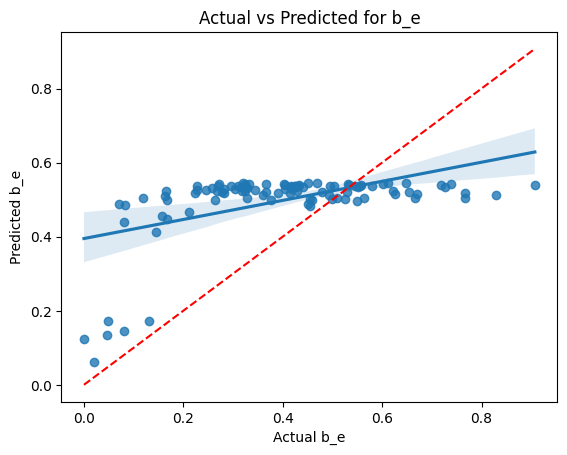

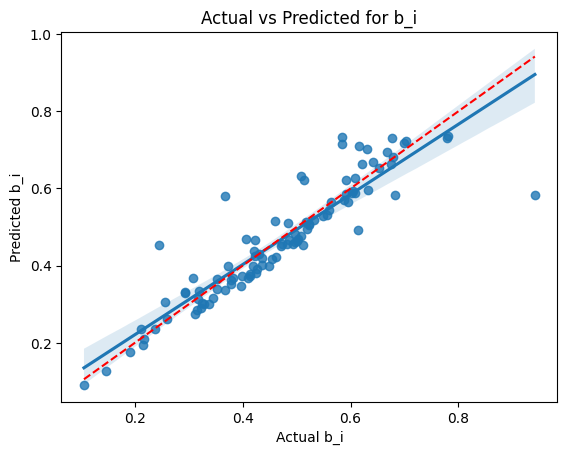

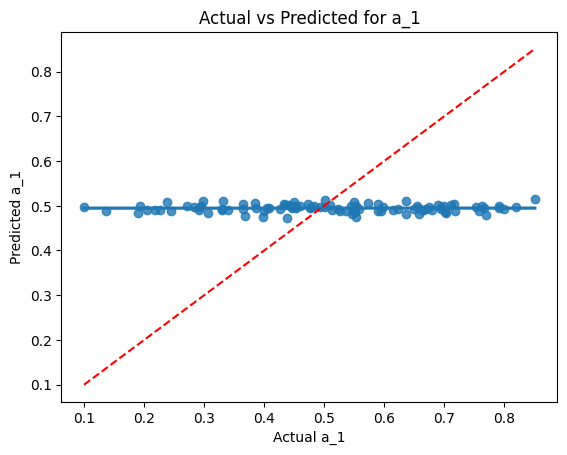

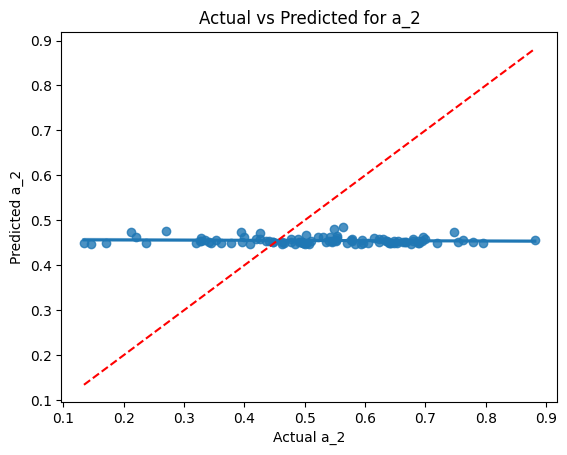

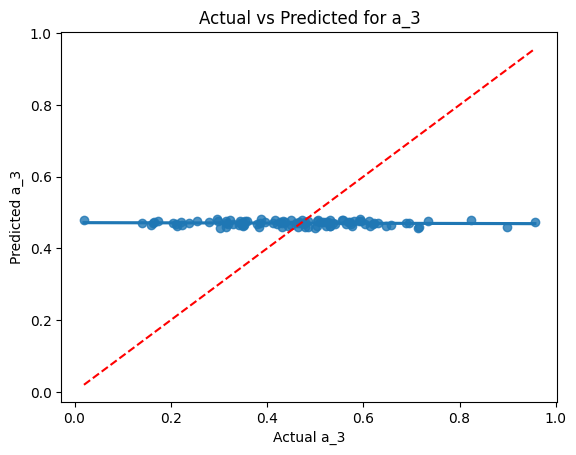

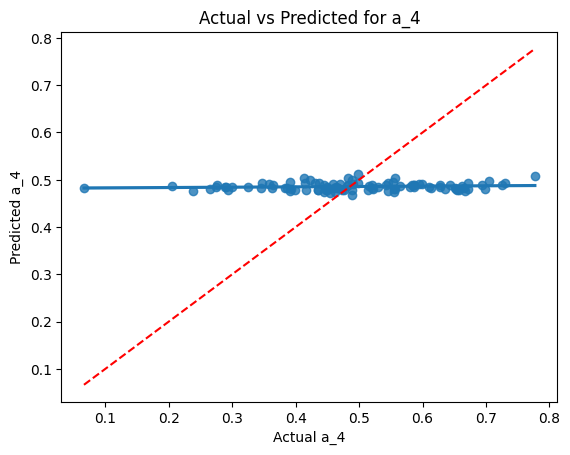

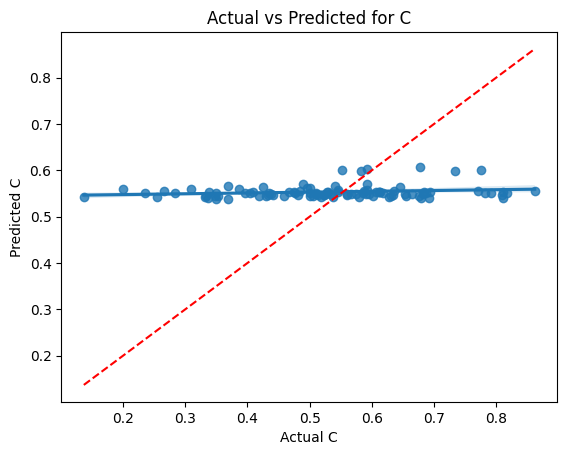

Correlation for A_e: 0.1182
Correlation for A_i: 0.9904
Correlation for b_e: 0.5184
Correlation for b_i: 0.9102
Correlation for a_1: 0.0031
Correlation for a_2: -0.0796
Correlation for a_3: -0.0750
Correlation for a_4: 0.1242
Correlation for C: 0.1897
Epoch [1/50], Loss: 0.2059
Epoch [2/50], Loss: 0.0305
Epoch [3/50], Loss: 0.0279
Epoch [4/50], Loss: 0.0286
Epoch [5/50], Loss: 0.0292
Epoch [6/50], Loss: 0.0286
Epoch [7/50], Loss: 0.0281
Epoch [8/50], Loss: 0.0285
Epoch [9/50], Loss: 0.0286
Epoch [10/50], Loss: 0.0282
Epoch [11/50], Loss: 0.0256
Epoch [12/50], Loss: 0.0259
Epoch [13/50], Loss: 0.0261
Epoch [14/50], Loss: 0.0254
Epoch [15/50], Loss: 0.0253
Epoch [16/50], Loss: 0.0261
Epoch [17/50], Loss: 0.0261
Epoch [18/50], Loss: 0.0266
Epoch [19/50], Loss: 0.0255
Epoch [20/50], Loss: 0.0240
Epoch [21/50], Loss: 0.0234
Epoch [22/50], Loss: 0.0232
Epoch [23/50], Loss: 0.0234
Epoch [24/50], Loss: 0.0245
Epoch [25/50], Loss: 0.0231
Epoch [26/50], Loss: 0.0231
Epoch [27/50], Loss: 0.0229
E

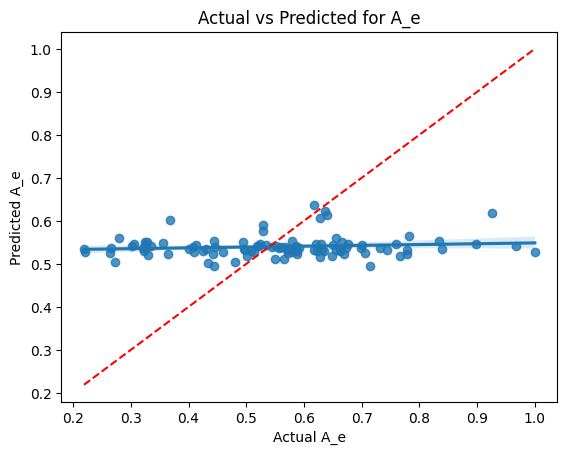

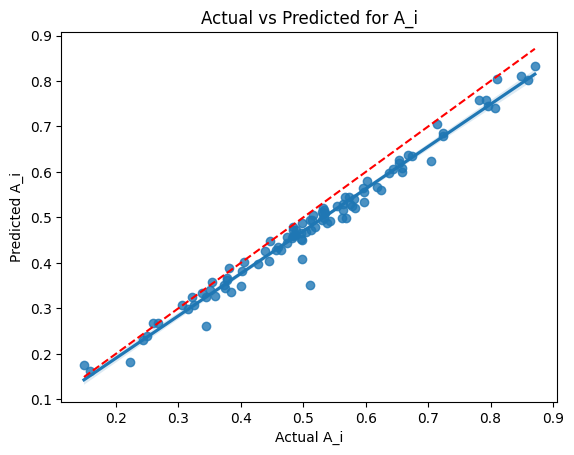

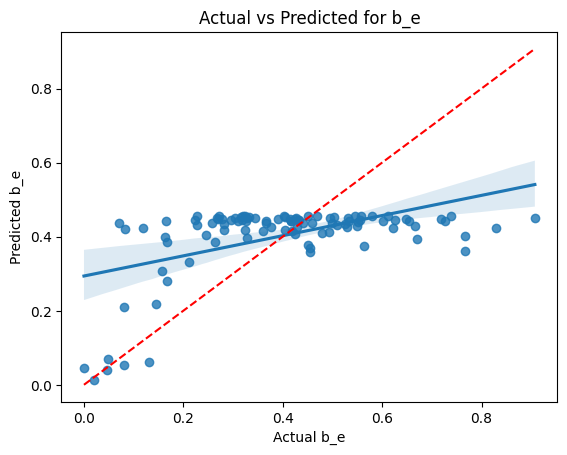

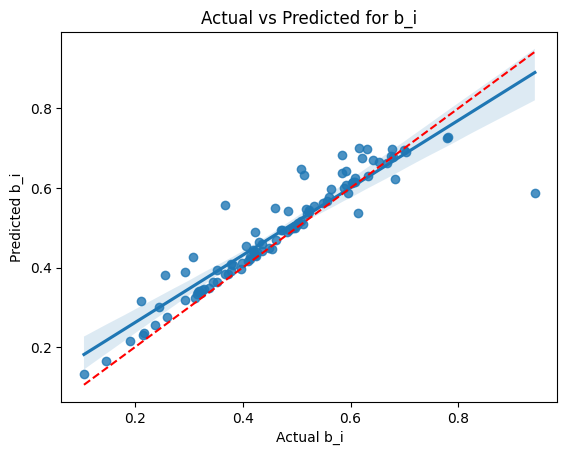

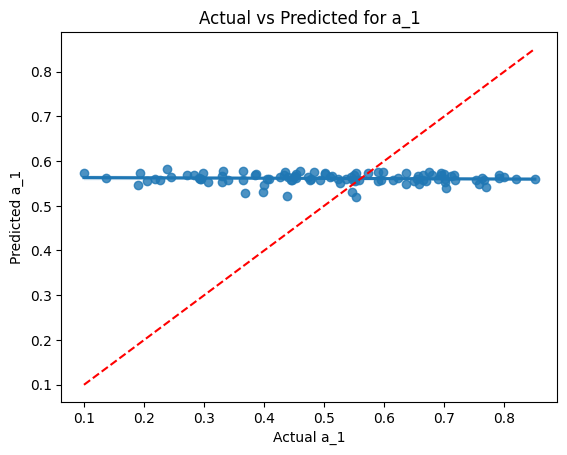

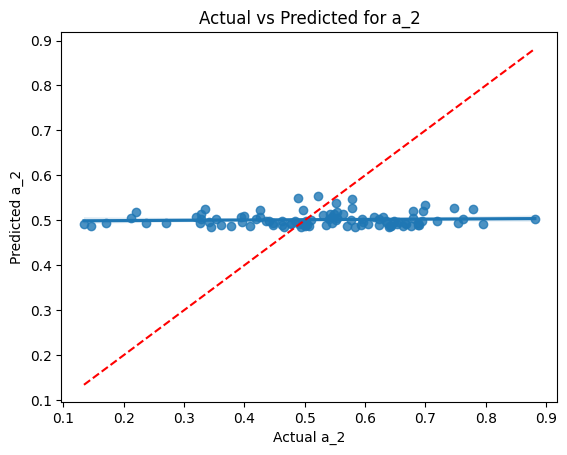

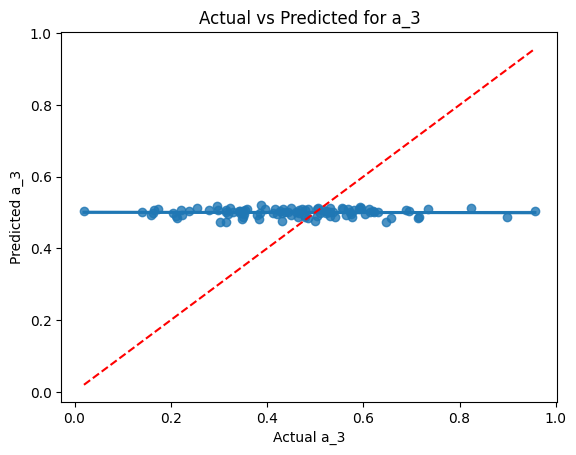

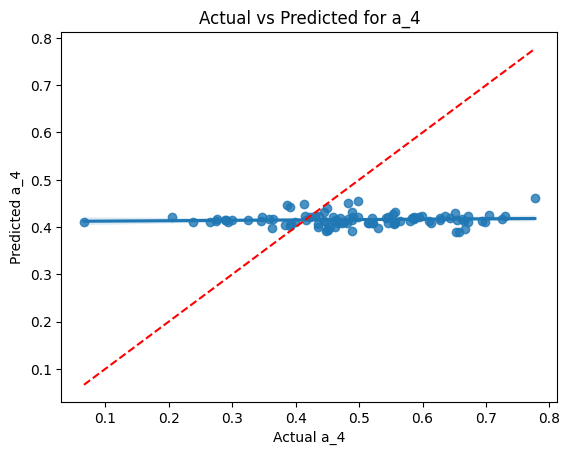

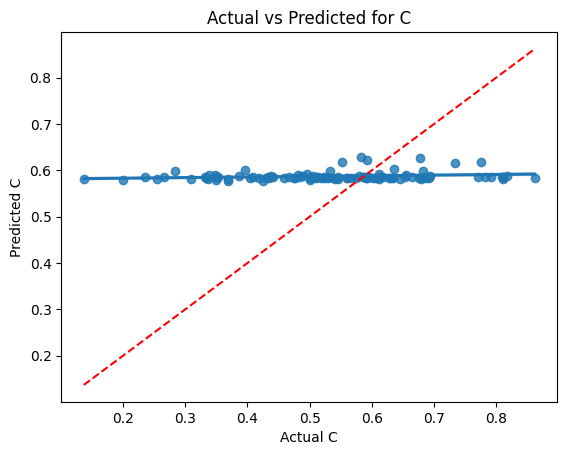

Correlation for A_e: 0.1300
Correlation for A_i: 0.9876
Correlation for b_e: 0.5224
Correlation for b_i: 0.9332
Correlation for a_1: -0.0688
Correlation for a_2: 0.0654
Correlation for a_3: -0.0140
Correlation for a_4: 0.0802
Correlation for C: 0.2058
Epoch [1/50], Loss: 0.2003
Epoch [2/50], Loss: 0.0308
Epoch [3/50], Loss: 0.0288
Epoch [4/50], Loss: 0.0290
Epoch [5/50], Loss: 0.0286
Epoch [6/50], Loss: 0.0296
Epoch [7/50], Loss: 0.0289
Epoch [8/50], Loss: 0.0291
Epoch [9/50], Loss: 0.0290
Epoch [10/50], Loss: 0.0266
Epoch [11/50], Loss: 0.0266
Epoch [12/50], Loss: 0.0260
Epoch [13/50], Loss: 0.0259
Epoch [14/50], Loss: 0.0265
Epoch [15/50], Loss: 0.0257
Epoch [16/50], Loss: 0.0255
Epoch [17/50], Loss: 0.0249
Epoch [18/50], Loss: 0.0246
Epoch [19/50], Loss: 0.0234
Epoch [20/50], Loss: 0.0227
Epoch [21/50], Loss: 0.0230
Epoch [22/50], Loss: 0.0232
Epoch [23/50], Loss: 0.0233
Epoch [24/50], Loss: 0.0237
Epoch [25/50], Loss: 0.0239
Epoch [26/50], Loss: 0.0222
Epoch [27/50], Loss: 0.0221
E

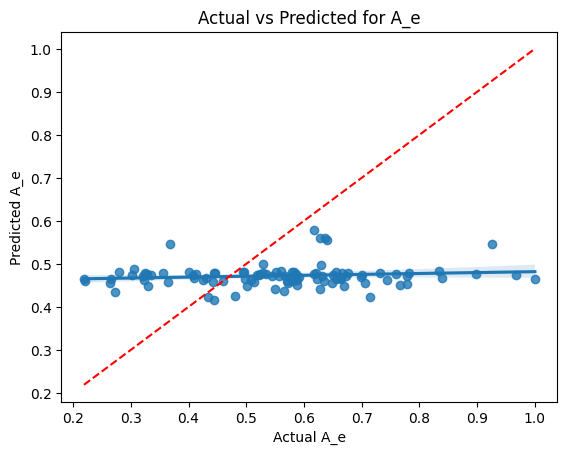

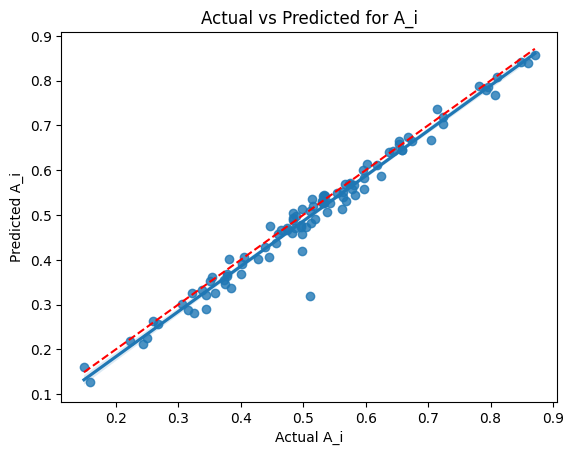

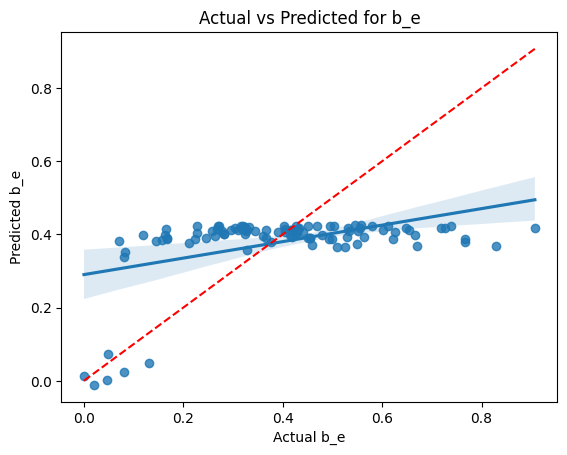

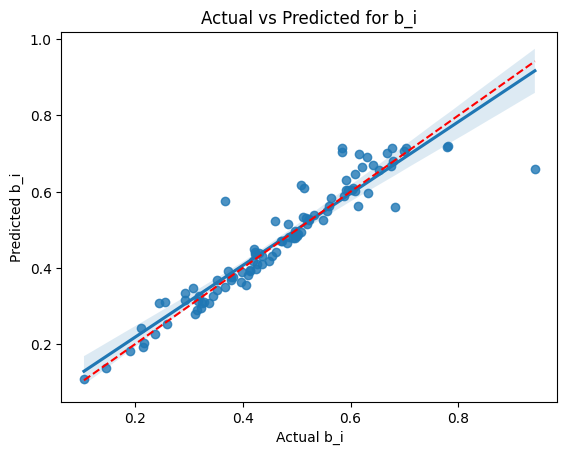

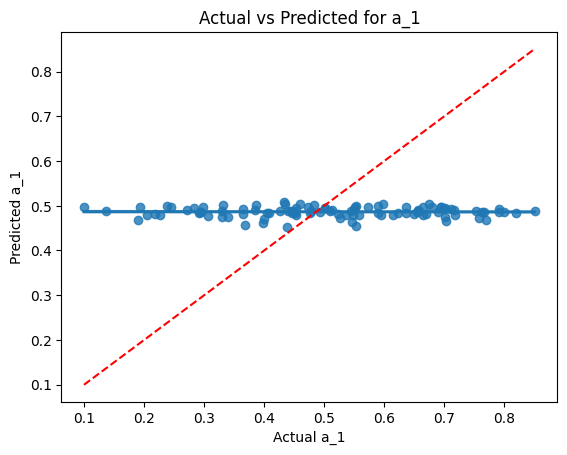

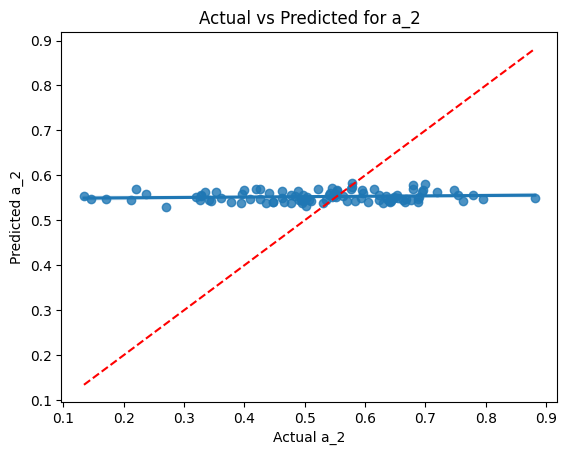

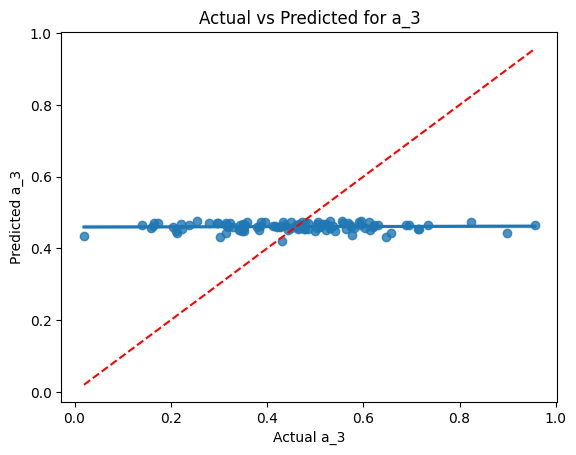

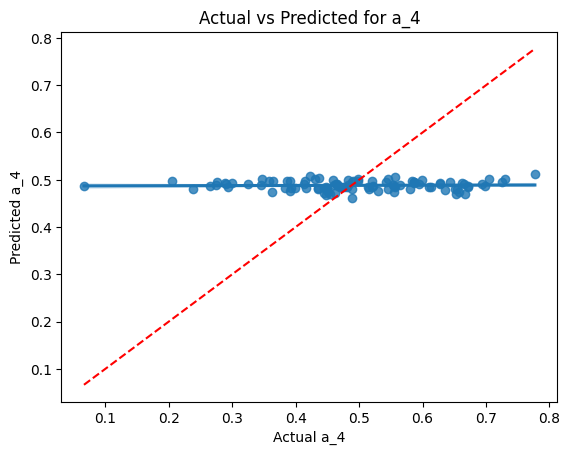

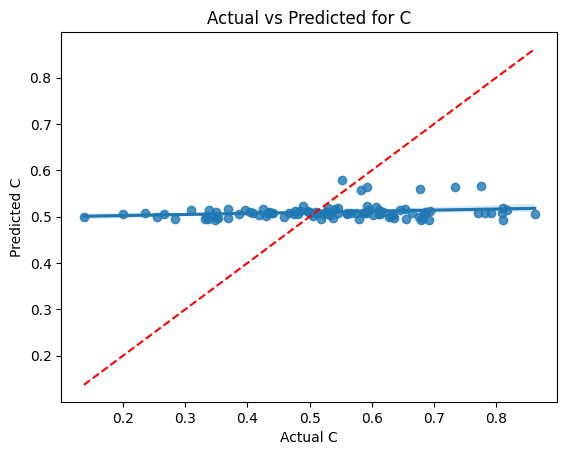

Correlation for A_e: 0.1331
Correlation for A_i: 0.9859
Correlation for b_e: 0.4692
Correlation for b_i: 0.9423
Correlation for a_1: -0.0133
Correlation for a_2: 0.1145
Correlation for a_3: 0.0351
Correlation for a_4: 0.0349
Correlation for C: 0.2243
Epoch [1/50], Loss: 0.2077
Epoch [2/50], Loss: 0.0305
Epoch [3/50], Loss: 0.0284
Epoch [4/50], Loss: 0.0283
Epoch [5/50], Loss: 0.0285
Epoch [6/50], Loss: 0.0285
Epoch [7/50], Loss: 0.0288
Epoch [8/50], Loss: 0.0300
Epoch [9/50], Loss: 0.0290
Epoch [10/50], Loss: 0.0291
Epoch [11/50], Loss: 0.0299
Epoch [12/50], Loss: 0.0273
Epoch [13/50], Loss: 0.0257
Epoch [14/50], Loss: 0.0259
Epoch [15/50], Loss: 0.0252
Epoch [16/50], Loss: 0.0258
Epoch [17/50], Loss: 0.0243
Epoch [18/50], Loss: 0.0234
Epoch [19/50], Loss: 0.0232
Epoch [20/50], Loss: 0.0236
Epoch [21/50], Loss: 0.0227
Epoch [22/50], Loss: 0.0228
Epoch [23/50], Loss: 0.0228
Epoch [24/50], Loss: 0.0224
Epoch [25/50], Loss: 0.0228
Epoch [26/50], Loss: 0.0229
Epoch [27/50], Loss: 0.0226
Ep

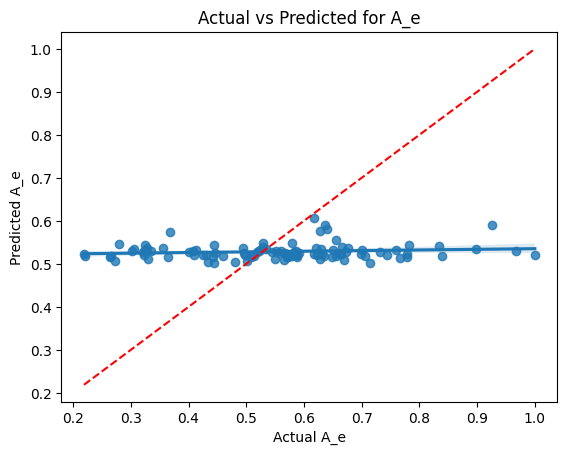

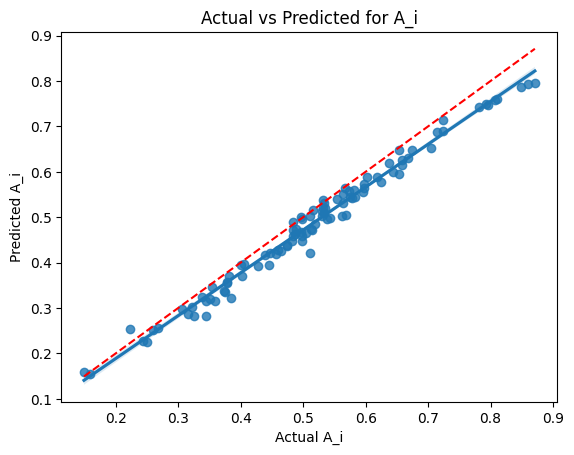

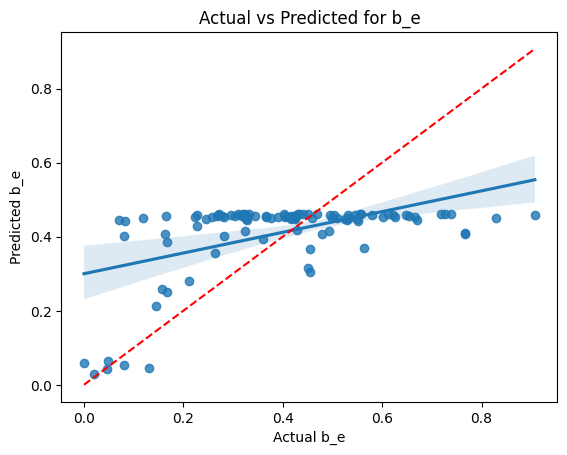

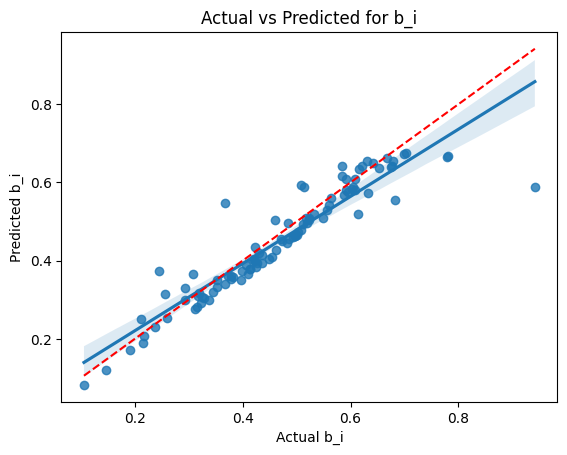

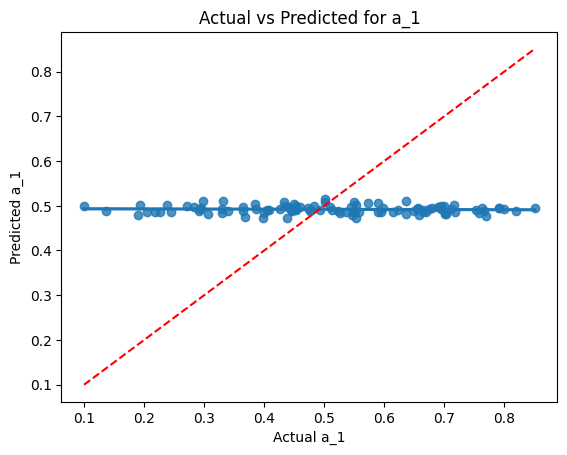

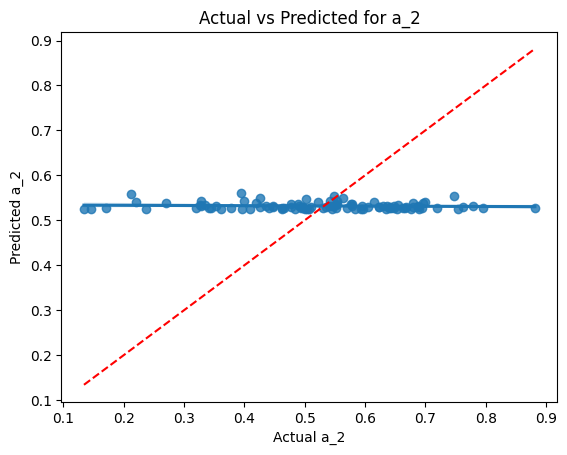

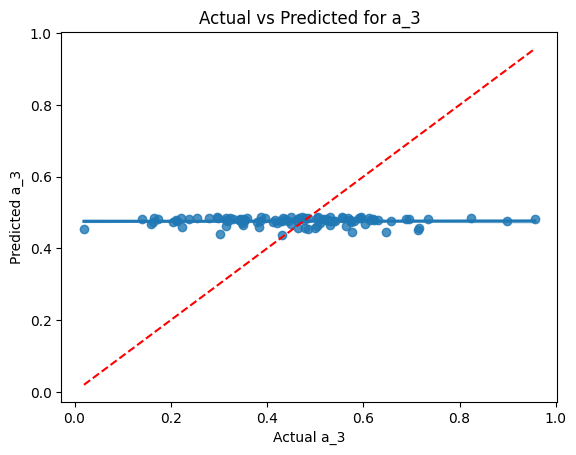

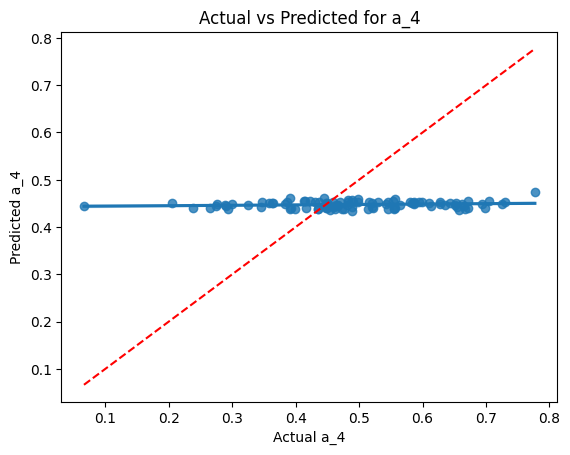

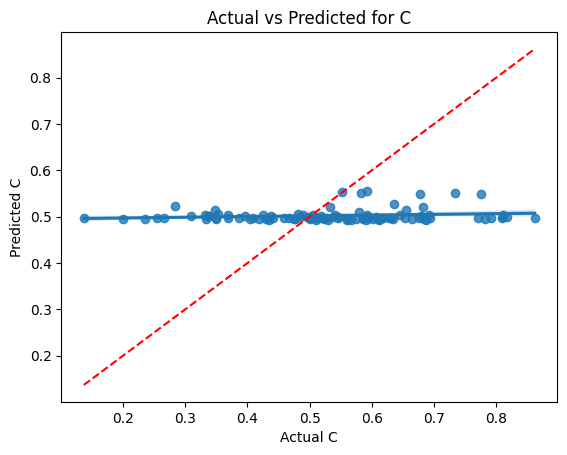

Correlation for A_e: 0.1359
Correlation for A_i: 0.9923
Correlation for b_e: 0.5180
Correlation for b_i: 0.9356
Correlation for a_1: -0.0595
Correlation for a_2: -0.0856
Correlation for a_3: 0.0128
Correlation for a_4: 0.1623
Correlation for C: 0.1668
Epoch [1/50], Loss: 0.1867
Epoch [2/50], Loss: 0.0306
Epoch [3/50], Loss: 0.0288
Epoch [4/50], Loss: 0.0289
Epoch [5/50], Loss: 0.0288
Epoch [6/50], Loss: 0.0305
Epoch [7/50], Loss: 0.0293
Epoch [8/50], Loss: 0.0290
Epoch [9/50], Loss: 0.0299
Epoch [10/50], Loss: 0.0294
Epoch [11/50], Loss: 0.0265
Epoch [12/50], Loss: 0.0256
Epoch [13/50], Loss: 0.0261
Epoch [14/50], Loss: 0.0254
Epoch [15/50], Loss: 0.0257
Epoch [16/50], Loss: 0.0263
Epoch [17/50], Loss: 0.0265
Epoch [18/50], Loss: 0.0259
Epoch [19/50], Loss: 0.0252
Epoch [20/50], Loss: 0.0249
Epoch [21/50], Loss: 0.0230
Epoch [22/50], Loss: 0.0234
Epoch [23/50], Loss: 0.0228
Epoch [24/50], Loss: 0.0235
Epoch [25/50], Loss: 0.0231
Epoch [26/50], Loss: 0.0232
Epoch [27/50], Loss: 0.0237
E

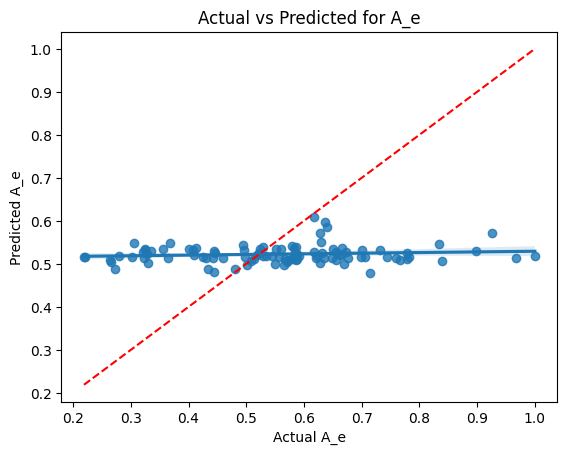

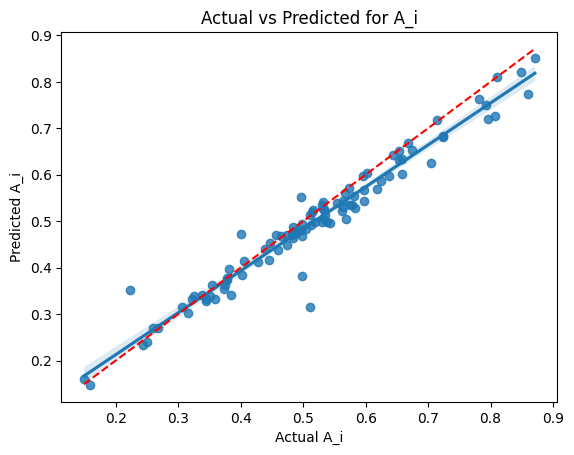

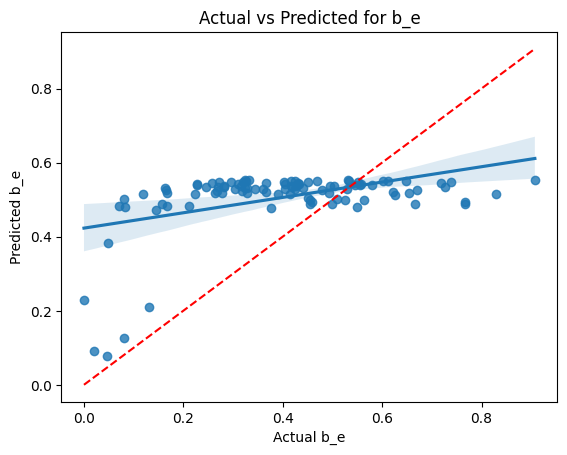

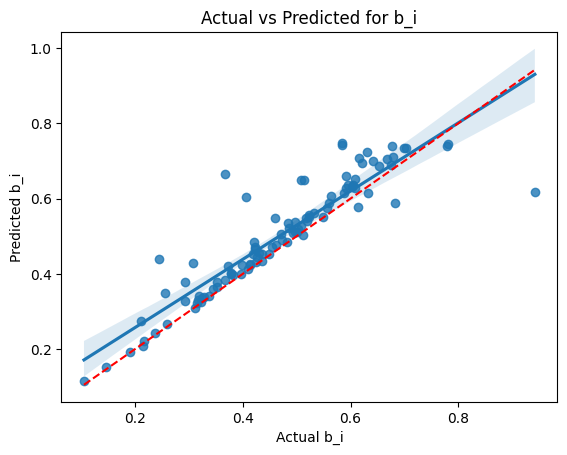

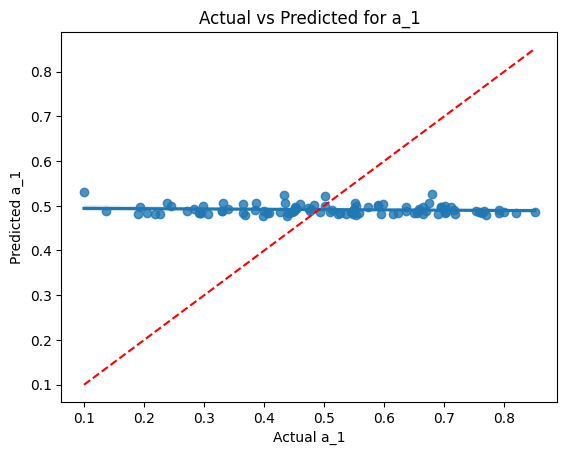

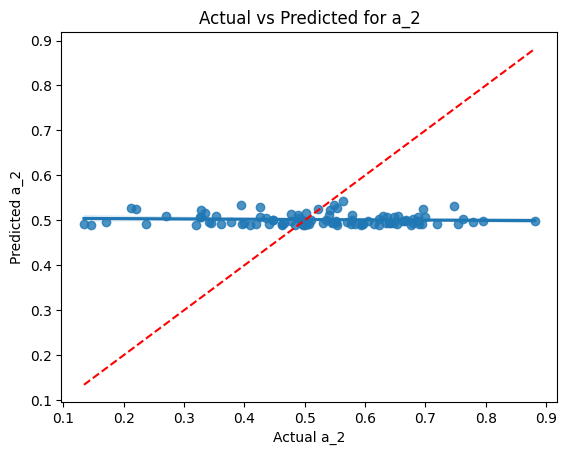

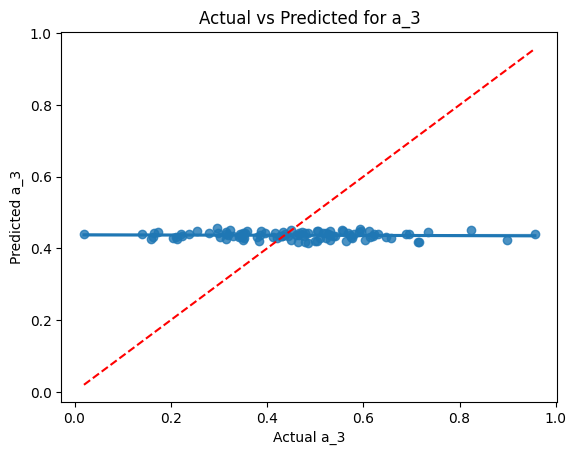

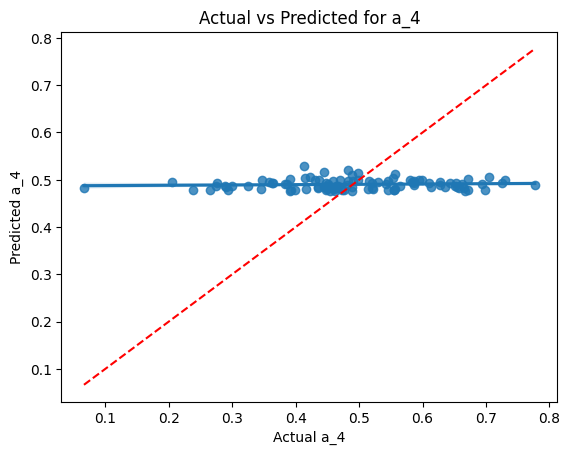

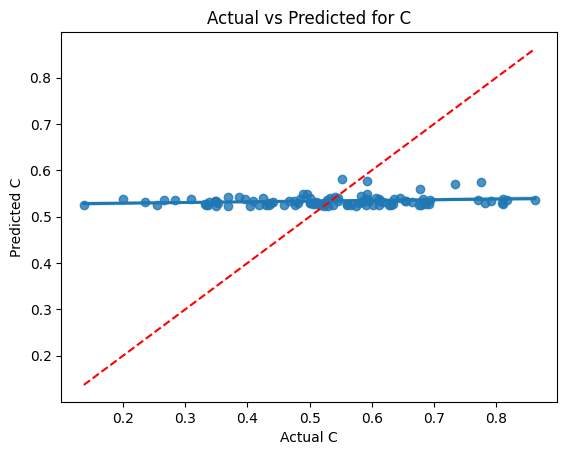

Correlation for A_e: 0.1198
Correlation for A_i: 0.9736
Correlation for b_e: 0.4532
Correlation for b_i: 0.9109
Correlation for a_1: -0.1133
Correlation for a_2: -0.0778
Correlation for a_3: -0.0462
Correlation for a_4: 0.0819
Correlation for C: 0.1998


In [ ]:
from deepjr.transformer import EEGTransformer, JRInvDataLoader

noise_factors = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
path = "./deepjr_training_data"
estim_params = ('A_e', 'A_i', 'b_e', 'b_i', 'a_1', 'a_2', 'a_3', 'a_4', 'C')
nb_sims = 1000

results = []

for noise_fact in noise_factors:
    # Initialize the Data Loader
    data_loader = JRInvDataLoader(nb_sims=nb_sims, path=path, estim_params=estim_params, noise_fact=noise_fact)
    data_loader.prepare_data()

    # Get dimensions: assume X_train shape is (num_samples, num_channels, num_timepoints)
    num_channels = data_loader.X_train.shape[1]
    num_timepoints = data_loader.X_train.shape[2]

    model = EEGTransformer(
        num_channels=num_channels, 
        num_timepoints=num_timepoints,
        output_dim=len(estim_params), 
        estim_params=estim_params,
        embed_dim=256,        
        num_heads=8,          
        hidden_dim=128,       
        hidden_ffn_dim=512,   
        intermediate_dim=1024,
        ffn_output_dim=256,   
        dropout=0.2           
    )

    # Train the model
    model.train_model(data_loader.X_train, data_loader.y_train, data_loader.X_val, data_loader.y_val, epochs=50, batch_size=32)

    # Evaluate the model
    mse = model.evaluate_model(data_loader.X_test, data_loader.y_test)  # Returns only MSE
    correlations = model.print_correlations(data_loader.X_test, data_loader.y_test)  # Fetch correlations separately

    results.append(f"Noise Factor: {noise_fact}, MSE: {mse}, Correlations: {correlations}\n")

    # Plot predictions vs. actual values
    #model.plot_test_regressions(data_loader.X_test, data_loader.y_test)

    # Print correlations between predictions and actual values
    model.print_correlations(data_loader.X_test, data_loader.y_test)

# Save results to a file
with open("evaluation_results_eegtransformer.txt", "w") as f:
    f.writelines(results)


In [22]:
# New JR LSTM Model
from deepjr.jr_inv_lstm_model import JRInvLSTMModel, JRInvDataLoader


# Set parameters

estim_params = ('A_e', 'A_i', 'b_e', 'b_i', 'a_1', 'a_2', 'a_3', 'a_4', 'C')
nb_sims = 1000
noise_factors = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

results = []

for noise_fact in noise_factors:
    ## Initialize the data loader and prepare data
    data_loader = JRInvDataLoader(nb_sims=nb_sims, path=path, estim_params=estim_params, noise_fact=noise_fact)

    # Prepare the data (load and scale)
    data_loader.prepare_data()

    # Initialize the LSTM model
    seq_length = data_loader.X_train.shape[1]  # (number of time steps)
    input_dim = data_loader.X_train.shape[2]   # (number of features, EEG channels)

    model = JRInvLSTMModel(input_dim=input_dim, 
                           seq_length=seq_length,  # Pass seq_length
                           num_params=len(estim_params),
                           estim_params=estim_params,
                           hidden_size=64, num_layers=2, dropout=0.2)

    # Train the model using JRInvDataLoader's train_model method
    model.train_model(data_loader.X_train, data_loader.y_train, epochs=50, batch_size=32)

    # Evaluate the model
    mse = model.evaluate_model(data_loader.X_test, data_loader.y_test)  # Returns only MSE
    correlations = model.print_correlations(data_loader.X_test, data_loader.y_test, estim_params)  # Fetch correlations separately

    results.append(f"Noise Factor: {noise_fact}, MSE: {mse}, Correlations: {correlations}\n")

# Save results to a file
with open("evaluation_results_lstm.txt", "w") as f:
    f.writelines(results)


Epoch [1/50], Loss: 0.0018
Epoch [2/50], Loss: 0.0008
Epoch [3/50], Loss: 0.0008
Epoch [4/50], Loss: 0.0008
Epoch [5/50], Loss: 0.0008
Epoch [6/50], Loss: 0.0008
Epoch [7/50], Loss: 0.0008
Epoch [8/50], Loss: 0.0008
Epoch [9/50], Loss: 0.0008
Epoch [10/50], Loss: 0.0008
Epoch [11/50], Loss: 0.0008
Epoch [12/50], Loss: 0.0008
Epoch [13/50], Loss: 0.0008
Epoch [14/50], Loss: 0.0008
Epoch [15/50], Loss: 0.0008
Epoch [16/50], Loss: 0.0008
Epoch [17/50], Loss: 0.0008
Epoch [18/50], Loss: 0.0008
Epoch [19/50], Loss: 0.0008
Epoch [20/50], Loss: 0.0008
Epoch [21/50], Loss: 0.0008
Epoch [22/50], Loss: 0.0008
Epoch [23/50], Loss: 0.0008
Epoch [24/50], Loss: 0.0008
Epoch [25/50], Loss: 0.0008
Epoch [26/50], Loss: 0.0008
Epoch [27/50], Loss: 0.0008
Epoch [28/50], Loss: 0.0008
Epoch [29/50], Loss: 0.0008
Epoch [30/50], Loss: 0.0008
Epoch [31/50], Loss: 0.0008
Epoch [32/50], Loss: 0.0008
Epoch [33/50], Loss: 0.0008
Epoch [34/50], Loss: 0.0008
Epoch [35/50], Loss: 0.0008
Epoch [36/50], Loss: 0.0008
E